In [27]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as mtplt
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from wordcloud import WordCloud, STOPWORDS
import chardet
pyLDAvis.enable_notebook()
import string
import re
import math
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster

[nltk_data] Downloading package punkt to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
with open('../data/nlp_vader_textblob_classified_data.csv', 'rb') as f:
    enc = chardet.detect(f.read())  # or readline if the file is large
    
tweetData = pd.read_csv('../data/nlp_vader_textblob_classified_data.csv', encoding = enc['encoding'], index_col=False)
tweetData

username  verified  followersCount  \
0      HuyThanhNguyen5     False               0   
1         guaslackjack     False             125   
2              gerryrb     False             935   
3           rickitten_     False               9   
4           saboteurDS     False             278   
...                ...       ...             ...   
97393    ChelseaEleven     False           21757   
97394    amber_chelsea     False            2195   
97395      Dc_Solomon2     False             143   
97396    Marcus_Bryan_     False            5439   
97397  _MuhammadUwais_     False             112   

                                                 content  label  \
0      @unitedstandmufc @markgoldbridge get ole again...   -1.0   
1      best goal: bruno top assists: pogba ??: cristi...    1.0   
2      @lost_souls_07 @kayinfinite28 @altyred2 @utdpl...    0.0   
3      players spurs in old trafford #mufc #muntot ht...    0.0   
4      @tancredipalmeri why on earth would #mufc pay ...   -1.0   
...                                                  ...    ...   
97393  thank you for everything, Thomas Tuchel #CFC #...    NaN   
97394  @Chukwuemekaa10 thanks for the pic Carney ????...    NaN   
97395  Contacts ongoing between Chelsea and Brighton ...    NaN   
97396  Billy Gilmour left #ChelseaFC to join Brighton...    NaN   
97397  Matchday 7 of 38, let's go Blues ?? #CFC #KTBF...    NaN   

                            date    country  replyCount  retweetCount  \
0            2022-08-31 15:12:54      India           0             0   
1            2021-09-11 15:56:21      India           0             0   
2            2022-09-03 14:29:34  Argentina           1             0   
3            2022-03-12 19:14:18      India           0             0   
4            2022-08-28 12:07:34      India           0             0   
...                          ...        ...         ...           ...   
97393  2022-09-07 09:09:44+00:00      India           0             1   
97394  2022-08-27 13:17:33+00:00   Zimbabwe           0             0   
97395  2022-09-07 11:25:44+00:00   Zimbabwe           0             0   
97396  2022-09-08 16:43:30+00:00  Argentina           1             2   
97397  2021-10-02 13:58:31+00:00      India           0             0   

       likeCount  ... vader_neg vader_neu vader_pos vader_comp  \
0              0  ...     0.046     0.819     0.134     0.7133   
1              0  ...     0.000     0.561     0.439     0.8225   
2              1  ...     0.000     0.505     0.495     0.9562   
3              0  ...     0.000     1.000     0.000     0.0000   
4              2  ...     0.045     0.643     0.312     0.8072   
...          ...  ...       ...       ...       ...        ...   
97393          4  ...     0.000     0.667     0.333     0.3612   
97394          4  ...     0.000     0.580     0.420     0.4404   
97395          1  ...     0.000     1.000     0.000     0.0000   
97396         24  ...     0.000     0.805     0.195     0.5574   
97397          0  ...     0.000     1.000     0.000     0.0000   

                                              cleantext2  class  \
0          g e t   o l e   a g a i n   t o   t e l l ...     -1   
1      b e s t   g o a l :   b r u n o   t o p   a s ...      1   
2              i   d o   n o t   k n o w   i s   t h ...      1   
3      p l a y e r s   s p u r s   i n   o l d   t r ...      0   
4        w h y   o n   e a r t h   w o u l d     p a ...     -1   
...                                                  ...    ...   
97393  t h a n k   y o u   f o r   e v e r y t h i n ...      1   
97394    t h a n k s   f o r   t h e   p i c   c a r ...      1   
97395  c o n t a c t s   o n g o i n g   b e t w e e ...      0   
97396  b i l l y   g i l m o u r   l e f t     t o   ...      1   
97397  m a t c h d a y   7   o f   3 8 ,   l e t   u ...      0   

       TextBlob_Subjectivity  TextBlob_Polarity  TextBlob_Analysis final_class  
0                   0.600000

In [3]:
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return cn_a2_code
tweetData['codes'] = tweetData['country'].apply(get_continent)
tweetData

username  verified  followersCount  \
0      HuyThanhNguyen5     False               0   
1         guaslackjack     False             125   
2              gerryrb     False             935   
3           rickitten_     False               9   
4           saboteurDS     False             278   
...                ...       ...             ...   
97393    ChelseaEleven     False           21757   
97394    amber_chelsea     False            2195   
97395      Dc_Solomon2     False             143   
97396    Marcus_Bryan_     False            5439   
97397  _MuhammadUwais_     False             112   

                                                 content  label  \
0      @unitedstandmufc @markgoldbridge get ole again...   -1.0   
1      best goal: bruno top assists: pogba ??: cristi...    1.0   
2      @lost_souls_07 @kayinfinite28 @altyred2 @utdpl...    0.0   
3      players spurs in old trafford #mufc #muntot ht...    0.0   
4      @tancredipalmeri why on earth would #mufc pay ...   -1.0   
...                                                  ...    ...   
97393  thank you for everything, Thomas Tuchel #CFC #...    NaN   
97394  @Chukwuemekaa10 thanks for the pic Carney ????...    NaN   
97395  Contacts ongoing between Chelsea and Brighton ...    NaN   
97396  Billy Gilmour left #ChelseaFC to join Brighton...    NaN   
97397  Matchday 7 of 38, let's go Blues ?? #CFC #KTBF...    NaN   

                            date    country  replyCount  retweetCount  \
0            2022-08-31 15:12:54      India           0             0   
1            2021-09-11 15:56:21      India           0             0   
2            2022-09-03 14:29:34  Argentina           1             0   
3            2022-03-12 19:14:18      India           0             0   
4            2022-08-28 12:07:34      India           0             0   
...                          ...        ...         ...           ...   
97393  2022-09-07 09:09:44+00:00      India           0             1   
97394  2022-08-27 13:17:33+00:00   Zimbabwe           0             0   
97395  2022-09-07 11:25:44+00:00   Zimbabwe           0             0   
97396  2022-09-08 16:43:30+00:00  Argentina           1             2   
97397  2021-10-02 13:58:31+00:00      India           0             0   

       likeCount  ... vader_neu vader_pos vader_comp  \
0              0  ...     0.819     0.134     0.7133   
1              0  ...     0.561     0.439     0.8225   
2              1  ...     0.505     0.495     0.9562   
3              0  ...     1.000     0.000     0.0000   
4              2  ...     0.643     0.312     0.8072   
...          ...  ...       ...       ...        ...   
97393          4  ...     0.667     0.333     0.3612   
97394          4  ...     0.580     0.420     0.4404   
97395          1  ...     1.000     0.000     0.0000   
97396         24  ...     0.805     0.195     0.5574   
97397          0  ...     1.000     0.000     0.0000   

                                              cleantext2 class  \
0          g e t   o l e   a g a i n   t o   t e l l ...    -1   
1      b e s t   g o a l :   b r u n o   t o p   a s ...     1   
2              i   d o   n o t   k n o w   i s   t h ...     1   
3      p l a y e r s   s p u r s   i n   o l d   t r ...     0   
4        w h y   o n   e a r t h   w o u l d     p a ...    -1   
...                                                  ...   ...   
97393  t h a n k   y o u   f o r   e v e r y t h i n ...     1   
97394    t h a n k s   f o r   t h e   p i c   c a r ...     1   
97395  c o n t a c t s   o n g o i n g   b e t w e e ...     0   
97396  b i l l y   g i l m o u r   l e f t     t o   ...     1   
97397  m a t c h d a y   7   o f   3 8 ,   l e t   u ...     0   

       TextBlob_Subjectivity  TextBlob_Polarity  TextBlob_Analysis  \
0                   0.600000           0.290000                  1   
1                   0.400000           0.533333                  1   
2                   0.783333   

In [8]:
countries = tweetData['country'].tolist()
lat_long = []
alreadyDone = []
for country in countries:
    if(country in alreadyDone):
        continue
    else:
        alreadyDone.append(country)
        address= country
        geolocator = Nominatim(user_agent="Your_Name")
        location = geolocator.geocode(address)
        lat_long.append((country, (location.latitude, location.longitude)))
print(lat_long)

[('India', (22.3511148, 78.6677428)), ('Argentina', (-34.9964963, -64.9672817)), ('South Africa', (-28.8166236, 24.991639)), ('United States', (39.7837304, -100.445882)), ('Egypt', (26.2540493, 29.2675469)), ('Australia', (-24.7761086, 134.755)), ('United Kingdom', (54.7023545, -3.2765753)), ('Singapore', (1.357107, 103.8194992)), ('Mexico', (23.6585116, -102.0077097)), ('Sweden', (59.6749712, 14.5208584)), ('Norway', (60.5000209, 9.0999715)), ('Germany', (51.1638175, 10.4478313)), ('Brazil', (-10.3333333, -53.2)), ('Ireland', (52.865196, -7.9794599)), ('South Korea', (36.638392, 127.6961188)), ('Belgium', (50.6402809, 4.6667145)), ('Spain', (39.3260685, -4.8379791)), ('Nigeria', (9.6000359, 7.9999721)), ('Uruguay', (-32.8755548, -56.0201525)), ('Canada', (61.0666922, -107.991707)), ('New Zealand', (-41.5000831, 172.8344077)), ('Netherlands', (52.2434979, 5.6343227)), ('Italy', (42.6384261, 12.674297)), ('France', (46.603354, 1.8883335)), ('Switzerland', (46.7985624, 8.2319736)), ('Den

In [22]:
tweetData['Latitude'] = 0
tweetData['Longitude'] = 0
print(len(lat_long))
tweetData

34


username  verified  followersCount  \
0      HuyThanhNguyen5     False               0   
1         guaslackjack     False             125   
2              gerryrb     False             935   
3           rickitten_     False               9   
4           saboteurDS     False             278   
...                ...       ...             ...   
97393    ChelseaEleven     False           21757   
97394    amber_chelsea     False            2195   
97395      Dc_Solomon2     False             143   
97396    Marcus_Bryan_     False            5439   
97397  _MuhammadUwais_     False             112   

                                                 content  label  \
0      @unitedstandmufc @markgoldbridge get ole again...   -1.0   
1      best goal: bruno top assists: pogba ??: cristi...    1.0   
2      @lost_souls_07 @kayinfinite28 @altyred2 @utdpl...    0.0   
3      players spurs in old trafford #mufc #muntot ht...    0.0   
4      @tancredipalmeri why on earth would #mufc pay ...   -1.0   
...                                                  ...    ...   
97393  thank you for everything, Thomas Tuchel #CFC #...    NaN   
97394  @Chukwuemekaa10 thanks for the pic Carney ????...    NaN   
97395  Contacts ongoing between Chelsea and Brighton ...    NaN   
97396  Billy Gilmour left #ChelseaFC to join Brighton...    NaN   
97397  Matchday 7 of 38, let's go Blues ?? #CFC #KTBF...    NaN   

                            date    country  replyCount  retweetCount  \
0            2022-08-31 15:12:54      India           0             0   
1            2021-09-11 15:56:21      India           0             0   
2            2022-09-03 14:29:34  Argentina           1             0   
3            2022-03-12 19:14:18      India           0             0   
4            2022-08-28 12:07:34      India           0             0   
...                          ...        ...         ...           ...   
97393  2022-09-07 09:09:44+00:00      India           0             1   
97394  2022-08-27 13:17:33+00:00   Zimbabwe           0             0   
97395  2022-09-07 11:25:44+00:00   Zimbabwe           0             0   
97396  2022-09-08 16:43:30+00:00  Argentina           1             2   
97397  2021-10-02 13:58:31+00:00      India           0             0   

       likeCount  ...                                         cleantext2  \
0              0  ...      g e t   o l e   a g a i n   t o   t e l l ...   
1              0  ...  b e s t   g o a l :   b r u n o   t o p   a s ...   
2              1  ...          i   d o   n o t   k n o w   i s   t h ...   
3              0  ...  p l a y e r s   s p u r s   i n   o l d   t r ...   
4              2  ...    w h y   o n   e a r t h   w o u l d     p a ...   
...          ...  ...                                                ...   
97393          4  ...  t h a n k   y o u   f o r   e v e r y t h i n ...   
97394          4  ...    t h a n k s   f o r   t h e   p i c   c a r ...   
97395          1  ...  c o n t a c t s   o n g o i n g   b e t w e e ...   
97396         24  ...  b i l l y   g i l m o u r   l e f t     t o   ...   
97397          0  ...  m a t c h d a y   7   o f   3 8 ,   l e t   u ...   

      class TextBlob_Subjectivity TextBlob_Polarity TextBlob_Analysis  \
0        -1              0.600000          0.290000                 1   
1         1              0.400000          0.533333                 1   
2         1              0.783333          0.450000                 1   
3         0              0.200000          0.100000                 1   
4        -1              0.500000          0.500000                 1   
...     ...                   ...               ...               ...   
97393     1              0.000000          0.000000                 0   
97394     1              0.200000          0.200000                 1   
97395     0              0.400000          0.400000                 1   
97396     1              0.035897          0.000000             

In [24]:
for i in range(len(tweetData['country'])):
    if(tweetData['country'][i] == 'India'):
        tweetData['Latitude'][i] = 22.3511148
        tweetData['Longitude'][i] = 78.6677428
        
    elif(tweetData['country'][i] == 'Argentina'):
        tweetData['Latitude'][i] = -34.9964963
        tweetData['Longitude'][i] = -64.9672817
        
    elif(tweetData['country'][i] == 'South Africa'):
        tweetData['Latitude'][i] = -28.8166236
        tweetData['Longitude'][i] = 24.991639
        
    elif(tweetData['country'][i] == 'United States'):
        tweetData['Latitude'][i] = 39.7837304
        tweetData['Longitude'][i] = -100.445882
        
    elif(tweetData['country'][i] == 'Egypt'):
        tweetData['Latitude'][i] = 26.2540493
        tweetData['Longitude'][i] = 29.2675469
        
    elif(tweetData['country'][i] == 'United Kingdom'):
        tweetData['Latitude'][i] = 54.7023545
        tweetData['Longitude'][i] = -3.2765753
        
    elif(tweetData['country'][i] == 'Singapore'):
        tweetData['Latitude'][i] = 1.357107
        tweetData['Longitude'][i] = 103.8194992
        
    elif(tweetData['country'][i] == 'Mexico'):
        tweetData['Latitude'][i] = 23.6585116
        tweetData['Longitude'][i] = -102.0077097
        
    elif(tweetData['country'][i] == 'Sweden'):
        tweetData['Latitude'][i] = 59.6749712
        tweetData['Longitude'][i] = 14.5208584
        
    elif(tweetData['country'][i] == 'Norway'):
        tweetData['Latitude'][i] = 60.5000209
        tweetData['Longitude'][i] = 9.0999715
        
    elif(tweetData['country'][i] == 'Germany'):
        tweetData['Latitude'][i] = 51.1638175
        tweetData['Longitude'][i] = 10.4478313
        
    elif(tweetData['country'][i] == 'Brazil'):
        tweetData['Latitude'][i] = -10.3333333
        tweetData['Longitude'][i] = -53.2
        
    elif(tweetData['country'][i] == 'Ireland'):
        tweetData['Latitude'][i] = 52.865196
        tweetData['Longitude'][i] = -7.9794599
        
    elif(tweetData['country'][i] == 'South Korea'):
        tweetData['Latitude'][i] = 36.638392
        tweetData['Longitude'][i] = 127.6961188
        
    elif(tweetData['country'][i] == 'Belgium'):
        tweetData['Latitude'][i] = 50.6402809
        tweetData['Longitude'][i] = 4.6667145
        
    elif(tweetData['country'][i] == 'Spain'):
        tweetData['Latitude'][i] = 39.3260685
        tweetData['Longitude'][i] = -4.8379791
        
    elif(tweetData['country'][i] == 'Nigeria'):
        tweetData['Latitude'][i] = 9.6000359
        tweetData['Longitude'][i] = 7.9999721
        
    elif(tweetData['country'][i] == 'Uruguay'):
        tweetData['Latitude'][i] = -32.8755548
        tweetData['Longitude'][i] = -56.0201525
        
    elif(tweetData['country'][i] == 'Canada'):
        tweetData['Latitude'][i] = 61.0666922
        tweetData['Longitude'][i] = -107.991707
        
    elif(tweetData['country'][i] == 'New Zealand'):
        tweetData['Latitude'][i] = -41.5000831
        tweetData['Longitude'][i] = 172.8344077
        
    elif(tweetData['country'][i] == 'Netherlands'):
        tweetData['Latitude'][i] = 52.2434979
        tweetData['Longitude'][i] = 5.6343227
        
    elif(tweetData['country'][i] == 'Italy'):
        tweetData['Latitude'][i] = 42.6384261
        tweetData['Longitude'][i] = 12.674297
        
    elif(tweetData['country'][i] == 'France'):
        tweetData['Latitude'][i] = 46.603354
        tweetData['Longitude'][i] = 1.8883335
        
    elif(tweetData['country'][i] == 'Switzerland'):
        tweetData['Latitude'][i] = 46.7985624
        tweetData['Longitude'][i] = 8.2319736
        
    elif(tweetData['country'][i] == 'Denmark'):
        tweetData['Latitude'][i] = 55.670249
        tweetData['Longitude'][i] = 10.3333283
        
    elif(tweetData['country'][i] == 'Croatia'):
        tweetData['Latitude'][i] = 45.5643442
        tweetData['Longitude'][i] = 17.0118954
        
    elif(tweetData['country'][i] == 'Zimbabwe'):
        tweetData['Latitude'][i] = -18.4554963
        tweetData['Longitude'][i] = 29.7468414
        
    elif(tweetData['country'][i] == 'Kenya'):
        tweetData['Latitude'][i] = 1.4419683
        tweetData['Longitude'][i] = 38.4313975
        
    elif(tweetData['country'][i] == 'Japan'):
        tweetData['Latitude'][i] = 36.5748441
        tweetData['Longitude'][i] = 139.2394179
        
    elif(tweetData['country'][i] == 'Peru'):
        tweetData['Latitude'][i] = -6.8699697
        tweetData['Longitude'][i] = -75.0458515
        
    elif(tweetData['country'][i] == 'Trinidad and Tobago'):
        tweetData['Latitude'][i] = 10.7466905
        tweetData['Longitude'][i] = -61.0840075
        
    elif(tweetData['country'][i] == 'Portugal'):
        tweetData['Latitude'][i] = 39.6621648
        tweetData['Longitude'][i] = -8.1353519
        
    elif(tweetData['country'][i] == 'El Salvador'):
        tweetData['Latitude'][i] = 13.8000382
        tweetData['Longitude'][i] = -88.9140683

tweetData

C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_18820/2326568320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetData['Latitude'][i] = 22.3511148
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_18820/2326568320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetData['Longitude'][i] = 78.6677428
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_18820/2326568320.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetData['Lat

C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_18820/2326568320.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetData['Latitude'][i] = 39.3260685
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_18820/2326568320.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetData['Longitude'][i] = -4.8379791
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_18820/2326568320.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetData['

C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_18820/2326568320.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetData['Latitude'][i] = -6.8699697
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_18820/2326568320.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetData['Longitude'][i] = -75.0458515
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_18820/2326568320.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetDa

username  verified  followersCount  \
0      HuyThanhNguyen5     False               0   
1         guaslackjack     False             125   
2              gerryrb     False             935   
3           rickitten_     False               9   
4           saboteurDS     False             278   
...                ...       ...             ...   
97393    ChelseaEleven     False           21757   
97394    amber_chelsea     False            2195   
97395      Dc_Solomon2     False             143   
97396    Marcus_Bryan_     False            5439   
97397  _MuhammadUwais_     False             112   

                                                 content  label  \
0      @unitedstandmufc @markgoldbridge get ole again...   -1.0   
1      best goal: bruno top assists: pogba ??: cristi...    1.0   
2      @lost_souls_07 @kayinfinite28 @altyred2 @utdpl...    0.0   
3      players spurs in old trafford #mufc #muntot ht...    0.0   
4      @tancredipalmeri why on earth would #mufc pay ...   -1.0   
...                                                  ...    ...   
97393  thank you for everything, Thomas Tuchel #CFC #...    NaN   
97394  @Chukwuemekaa10 thanks for the pic Carney ????...    NaN   
97395  Contacts ongoing between Chelsea and Brighton ...    NaN   
97396  Billy Gilmour left #ChelseaFC to join Brighton...    NaN   
97397  Matchday 7 of 38, let's go Blues ?? #CFC #KTBF...    NaN   

                            date    country  replyCount  retweetCount  \
0            2022-08-31 15:12:54      India           0             0   
1            2021-09-11 15:56:21      India           0             0   
2            2022-09-03 14:29:34  Argentina           1             0   
3            2022-03-12 19:14:18      India           0             0   
4            2022-08-28 12:07:34      India           0             0   
...                          ...        ...         ...           ...   
97393  2022-09-07 09:09:44+00:00      India           0             1   
97394  2022-08-27 13:17:33+00:00   Zimbabwe           0             0   
97395  2022-09-07 11:25:44+00:00   Zimbabwe           0             0   
97396  2022-09-08 16:43:30+00:00  Argentina           1             2   
97397  2021-10-02 13:58:31+00:00      India           0             0   

       likeCount  ...                                         cleantext2  \
0              0  ...      g e t   o l e   a g a i n   t o   t e l l ...   
1              0  ...  b e s t   g o a l :   b r u n o   t o p   a s ...   
2              1  ...          i   d o   n o t   k n o w   i s   t h ...   
3              0  ...  p l a y e r s   s p u r s   i n   o l d   t r ...   
4              2  ...    w h y   o n   e a r t h   w o u l d     p a ...   
...          ...  ...                                                ...   
97393          4  ...  t h a n k   y o u   f o r   e v e r y t h i n ...   
97394          4  ...    t h a n k s   f o r   t h e   p i c   c a r ...   
97395          1  ...  c o n t a c t s   o n g o i n g   b e t w e e ...   
97396         24  ...  b i l l y   g i l m o u r   l e f t     t o   ...   
97397          0  ...  m a t c h d a y   7   o f   3 8 ,   l e t   u ...   

      class TextBlob_Subjectivity TextBlob_Polarity TextBlob_Analysis  \
0        -1              0.600000          0.290000                 1   
1         1              0.400000          0.533333                 1   
2         1              0.783333          0.450000                 1   
3         0              0.200000          0.100000                 1   
4        -1              0.500000          0.500000                 1   
...     ...                   ...               ...               ...   
97393     1              0.000000          0.000000                 0   
97394     1              0.200000          0.200000                 1   
97395     0              0.400000          0.400000                 1   
97396     1              0.035897          0.000000             

In [ ]:
print("Shape of data =>",tweetData.shape)

Shape of data => (97398, 25)


In [26]:
tweetData.to_csv('../data/forUI.csv')

In [ ]:
tweetData['content'].isnull().sum()

0

ManCity              25983
Manchester United    17802
Liverpool            15516
Chelsea              15239
Arsenal              14071
Tottenham             8787
Name: primaryTeam, dtype: int64


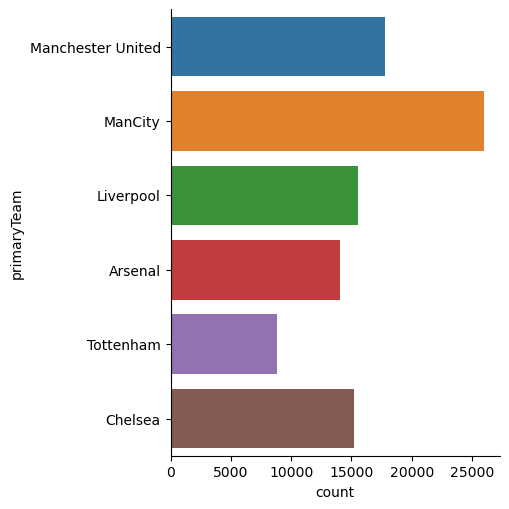

In [ ]:
print(tweetData["primaryTeam"].value_counts())
sb.catplot(y = "primaryTeam", data = tweetData, kind = "count")

In [4]:
manuData = tweetData.loc[tweetData['primaryTeam'] == 'Manchester United']
mancData = tweetData.loc[tweetData['primaryTeam'] == 'ManCity']
chelseaData = tweetData.loc[tweetData['primaryTeam'] == 'Chelsea']
arsenalData = tweetData.loc[tweetData['primaryTeam'] == 'Arsenal']
liverpoolData = tweetData.loc[tweetData['primaryTeam'] == 'Liverpool']
totData = tweetData.loc[tweetData['primaryTeam'] == 'Tottenham']

## Overall Stats

<AxesSubplot:>

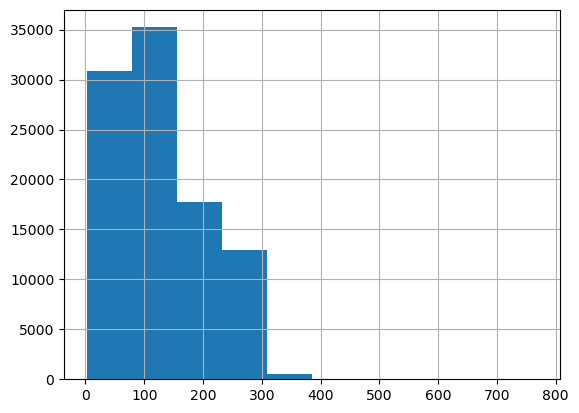

In [ ]:
tweetData['content'].str.len().hist()

<AxesSubplot:>

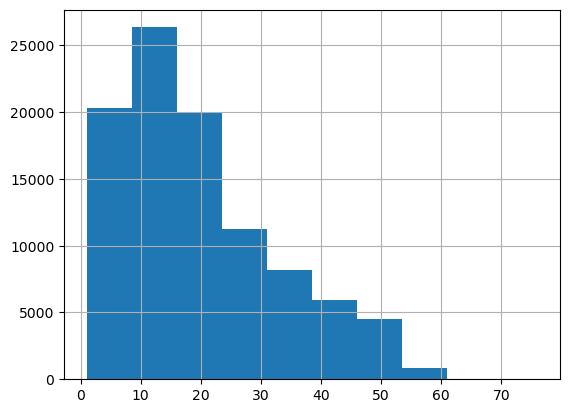

In [ ]:
tweetData['content'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

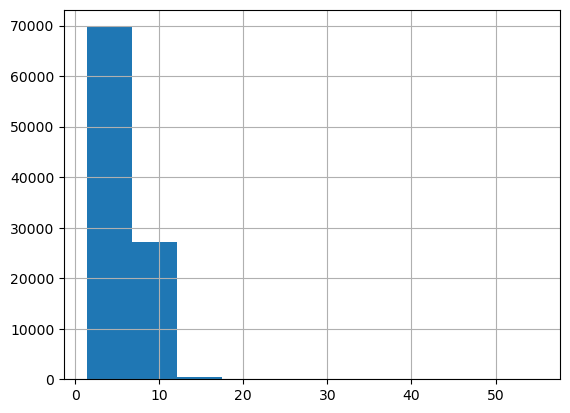

In [ ]:
tweetData['content'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [ ]:
stop=set(stopwords.words('english'))

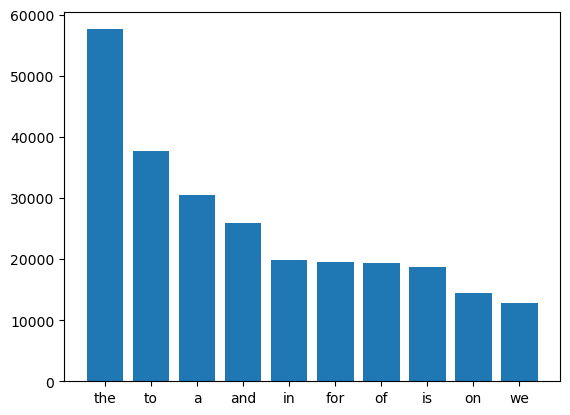

In [ ]:
# Plot the occurances of the most common stopwords in the dataset - create the corpus
corpus=[]
check= tweetData['content'].str.split()
check=check.values.tolist()
corpus=[word for i in check for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
mtplt.bar(x,y)
mtplt.show()

<AxesSubplot:>

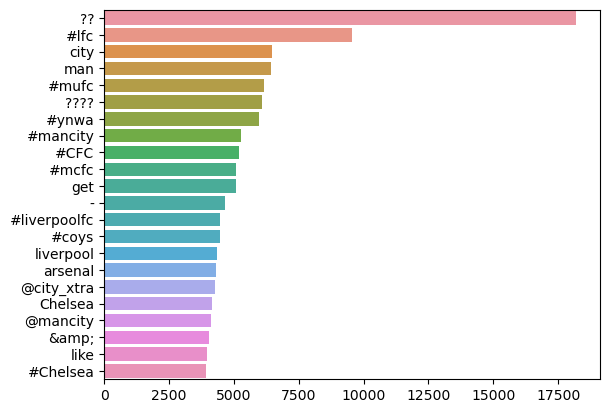

In [ ]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:60]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sb.barplot(x=y,y=x)

In [ ]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sb.barplot(x=y,y=x)

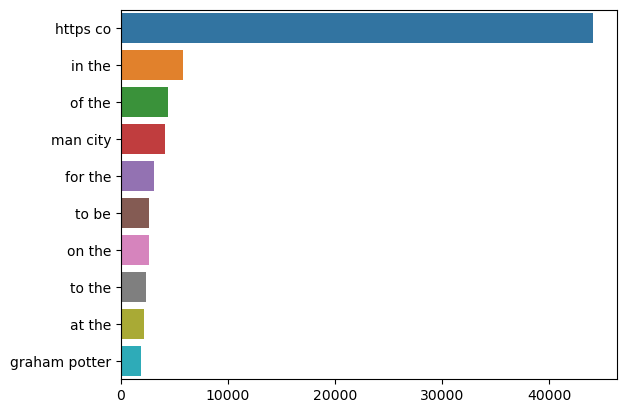

In [ ]:
plot_top_ngrams_barchart(tweetData['content'],2)

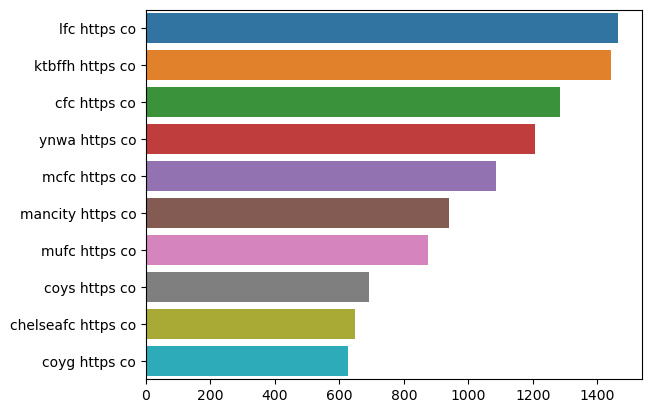

In [ ]:
plot_top_ngrams_barchart(tweetData['content'],3)

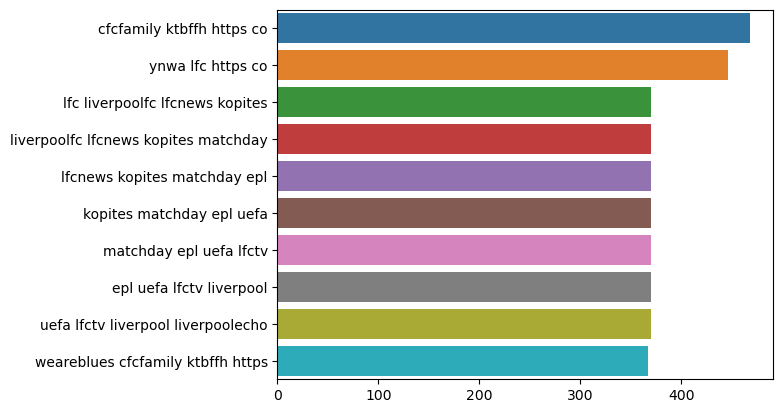

In [ ]:
plot_top_ngrams_barchart(tweetData['content'],4)

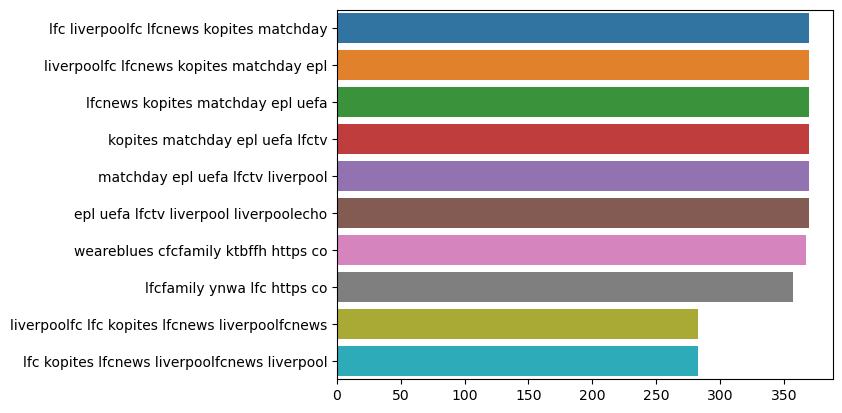

In [ ]:
plot_top_ngrams_barchart(tweetData['content'],5)

In [5]:
# The output of the following cells are interactable - to give a better idea of the dataset
def get_lda_objects(text):
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('wordnet')
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 10, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    vis = gensimvis.prepare(lda_model, bow_corpus, dic)
    return vis

In [6]:
lda_model, bow_corpus, dic = get_lda_objects(tweetData['content'])

[nltk_data] Downloading package stopwords to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
lda_model.show_topics()

[(0,
  '0.016*"game" + 0.014*"n\'t" + 0.013*"team" + 0.013*"get" + 0.012*"season" + 0.011*"like" + 0.011*"time" + 0.010*"player" + 0.009*"good" + 0.009*"one"'),
 (1,
  '0.076*"coys" + 0.059*"http" + 0.048*"spur" + 0.042*"thfc" + 0.019*"afc" + 0.014*"kane" + 0.014*"conte" + 0.013*"spursofficial" + 0.013*"mcfc" + 0.013*"cfc"'),
 (2,
  '0.102*"Chelsea" + 0.059*"CFC" + 0.057*"http" + 0.056*"ChelseaFC" + 0.033*"Tuchel" + 0.033*"KTBFFH" + 0.031*"Potter" + 0.019*"Graham" + 0.012*"manager" + 0.011*"Thomas"'),
 (3,
  '0.072*"lfc" + 0.060*"http" + 0.047*"ynwa" + 0.032*"liverpool" + 0.023*"liverpoolfc" + 0.015*"red" + 0.015*"lfcfamily" + 0.015*"klopp" + 0.013*"..." + 0.011*"totliv"'),
 (4,
  '0.069*"http" + 0.061*"arsenal" + 0.027*"league" + 0.019*"liverpool" + 0.017*"coyg" + 0.017*"tottenham" + 0.016*"premierleague" + 0.014*"epl" + 0.013*"win" + 0.013*"manchester"'),
 (5,
  '0.100*"http" + 0.014*"anfield" + 0.013*"football" + 0.012*"chelseafc" + 0.011*"chelsea" + 0.009*"amp" + 0.009*"london" + 0

In [8]:
# Can adjust the metric value, as well as the topics
p = plot_lda_vis(lda_model, bow_corpus, dic)
pyLDAvis.save_html(p, '../UI/lda.html')

C:\Users\Aishwarya Singh\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [37]:
def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = mtplt.figure(1, figsize=(12, 12))
    mtplt.axis('off')
 
    mtplt.imshow(wordcloud)
    mtplt.show()

[nltk_data] Downloading package stopwords to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


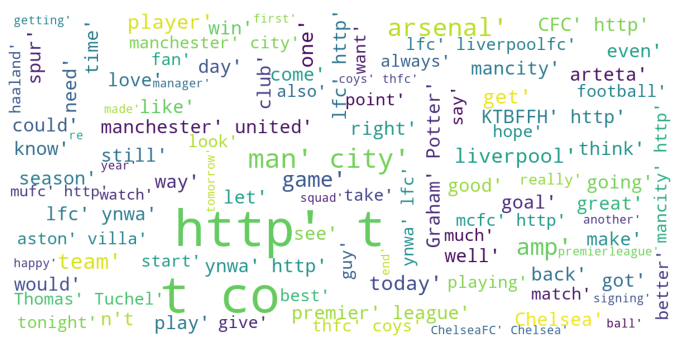

In [38]:
plot_wordcloud(tweetData['content'])

In [39]:
def featureEngineering(tweet):
    # Lower case tweet
    tweetMod = tweet.lower()
    # Replace URLs with a space in the message
    tweetMod = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweetMod)
    # Replace ticker symbols with a space. The ticker symbols are any stock symbol that starts with $.
    tweetMod = re.sub('\$[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace StockTwits usernames with a space. The usernames are any word that starts with @.
    tweetMod = re.sub('\@[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace everything not a letter or apostrophe with a space
    tweetMod = re.sub('[^a-zA-Z\']', ' ', tweetMod)
    # Remove single letter words
    tweetMod = ' '.join([w for w in tweetMod.split() if len(w) > 1])

    return tweetMod


# Process for all tweets
tweetData['modTweet'] = [featureEngineering(tweet) for tweet in tweetData['content']]

def lemmatizeTweet(tweet):
    words = [word for word in word_tokenize(tweet) if (word.isalpha()==1)]
    # Remove stop words
    stop = set(stopwords.words('english'))
    words = [word for word in words if (word not in stop)]
    # Lemmatize words (first noun, then verb)
    wnl = nltk.stem.WordNetLemmatizer()
    lemmatized = [wnl.lemmatize(wnl.lemmatize(word, 'n'), 'v') for word in words]
    return " ".join(lemmatized)

tweetData['lemmatizedText'] = tweetData["modTweet"].apply(lambda x:lemmatizeTweet(x))

<>:5: DeprecationWarning: invalid escape sequence \/
<>:7: DeprecationWarning: invalid escape sequence \$
<>:9: DeprecationWarning: invalid escape sequence \@
<>:5: DeprecationWarning: invalid escape sequence \/
<>:7: DeprecationWarning: invalid escape sequence \$
<>:9: DeprecationWarning: invalid escape sequence \@
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/3616694897.py:5: DeprecationWarning: invalid escape sequence \/
  tweetMod = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/3616694897.py:7: DeprecationWarning: invalid escape sequence \$
  tweetMod = re.sub('\$[a-zA-Z0-9]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/3616694897.py:9: DeprecationWarning: invalid escape sequence \@
  tweetMod = re.sub('\@[a-zA-Z0-9]*', ' ', tweetMod)


[nltk_data] Downloading package stopwords to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


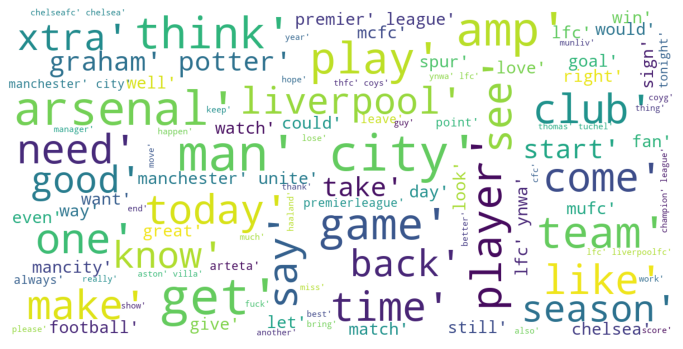

In [40]:
plot_wordcloud(tweetData['lemmatizedText'])

False    93080
True      4318
Name: verified, dtype: int64


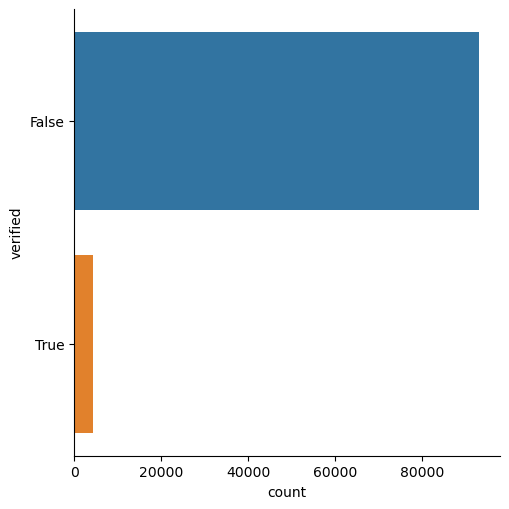

In [ ]:
print(tweetData["verified"].value_counts())
sb.catplot(y = "verified", data = tweetData, kind = "count")

Argentina              35425
United States          19731
India                  11085
Zimbabwe                6781
Denmark                 6675
Australia               5775
Brazil                  2436
South Africa            2423
Kenya                   1157
New Zealand             1001
Germany                  692
Singapore                617
Ireland                  516
Egypt                    509
Japan                    421
Belgium                  288
France                   223
United Kingdom           222
Uruguay                  195
Mexico                   190
Norway                   170
South Korea              149
Sweden                   143
Italy                    132
Canada                    96
Switzerland               83
Nigeria                   79
Spain                     50
Trinidad and Tobago       49
Peru                      39
Croatia                   23
Netherlands               21
Portugal                   1
El Salvador                1
Name: country,

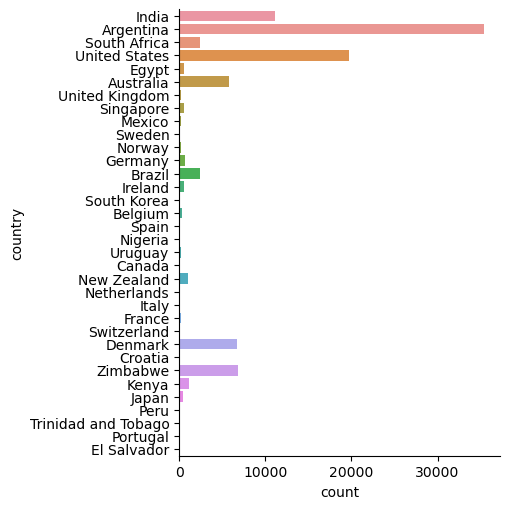

In [ ]:
print(tweetData["country"].value_counts())
sb.catplot(y = "country", data = tweetData, kind = "count")

 1    35030
 0    31549
-1    30819
Name: final_class, dtype: int64


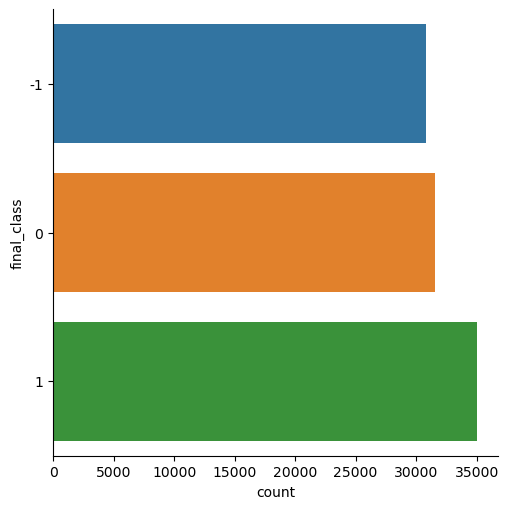

In [ ]:
print(tweetData["final_class"].value_counts())
sb.catplot(y = "final_class", data = tweetData, kind = "count")

## Manchester United

<AxesSubplot:>

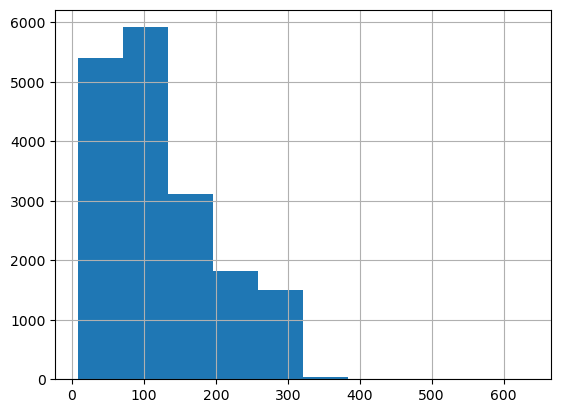

In [ ]:
manuData['content'].str.len().hist()

<AxesSubplot:>

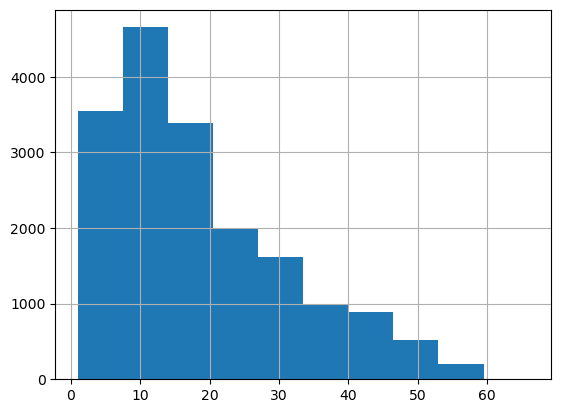

In [ ]:
manuData['content'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

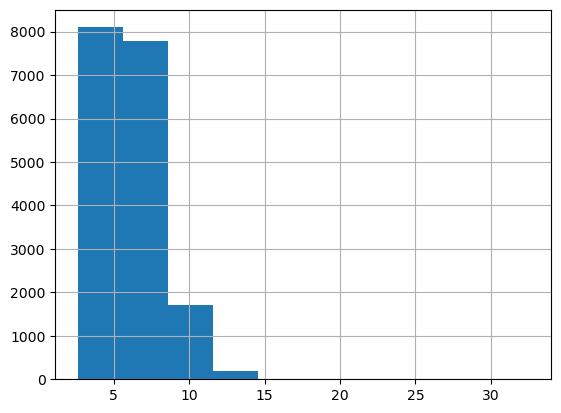

In [ ]:
manuData['content'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

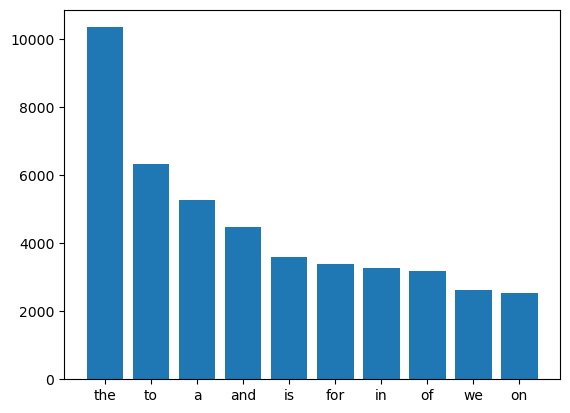

In [ ]:
# Plot the occurances of the most common stopwords in the dataset - create the corpus
corpus=[]
check= manuData['content'].str.split()
check=check.values.tolist()
corpus=[word for i in check for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
mtplt.bar(x,y)
mtplt.show()

<AxesSubplot:>

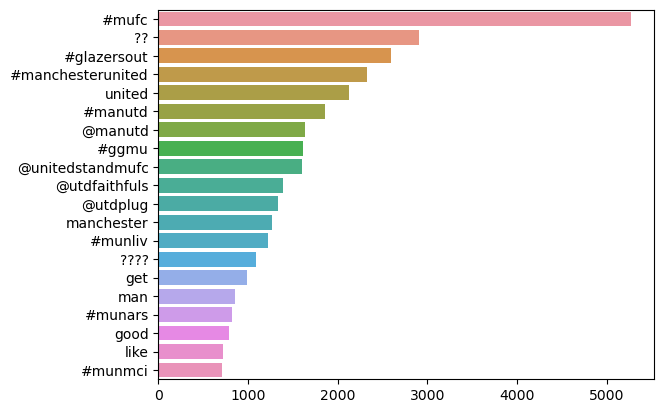

In [ ]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:60]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sb.barplot(x=y,y=x)

In [ ]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sb.barplot(x=y,y=x)

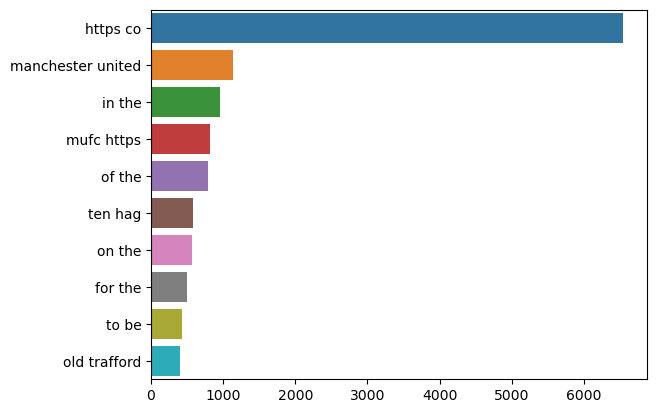

In [ ]:
plot_top_ngrams_barchart(manuData['content'],2)

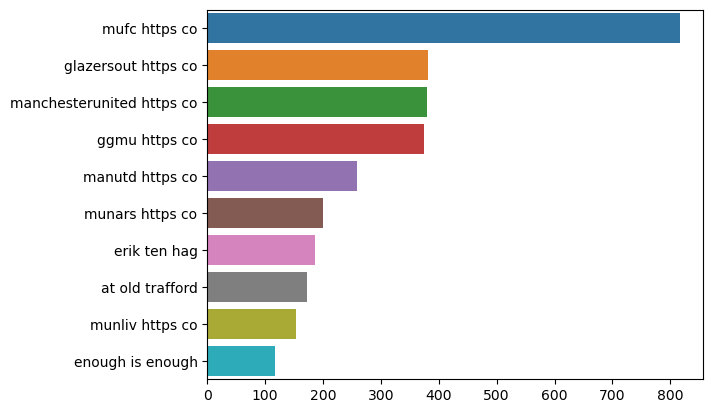

In [ ]:
plot_top_ngrams_barchart(manuData['content'],3)

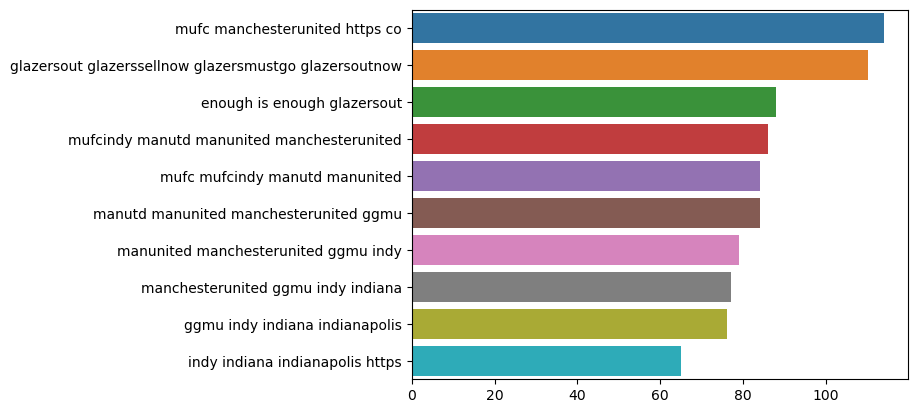

In [ ]:
plot_top_ngrams_barchart(manuData['content'],4)

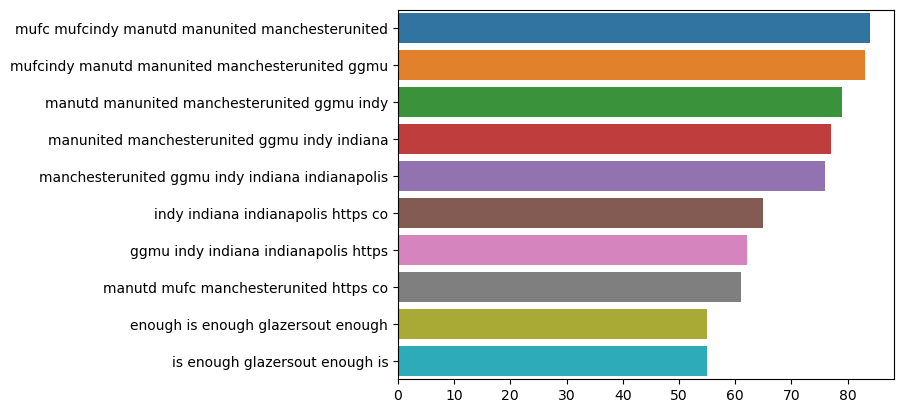

In [ ]:
plot_top_ngrams_barchart(manuData['content'],5)

In [9]:
lda_model, bow_corpus, dic = get_lda_objects(manuData['content'])

[nltk_data] Downloading package stopwords to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
lda_model.show_topics()

[(0,
  '0.041*"http" + 0.032*"mufc" + 0.023*"antony" + 0.018*"united" + 0.016*"manutd" + 0.012*"transfer" + 0.011*"ajax" + 0.010*"manchesterunited" + 0.009*"manchester" + 0.007*"deal"'),
 (1,
  '0.030*"utdfaithfuls" + 0.021*"mufc" + 0.017*"hag" + 0.017*"team" + 0.017*"ten" + 0.015*"game" + 0.013*"player" + 0.012*"like" + 0.010*"good" + 0.010*"first"'),
 (2,
  '0.066*"utdplug" + 0.025*"unitedstandmufc" + 0.016*"samuelluckhurst" + 0.015*"n\'t" + 0.011*"lauriewhitwell" + 0.009*"fabrizioromano" + 0.008*"would" + 0.008*"want" + 0.007*"like" + 0.006*"theathleticuk"'),
 (3,
  '0.054*"munmci" + 0.032*"united" + 0.018*"manchesterunited" + 0.017*"http" + 0.017*"city" + 0.017*"manchester" + 0.012*"manchesterderby" + 0.011*"man" + 0.011*"ole" + 0.007*"muwomen"'),
 (4,
  '0.078*"munliv" + 0.036*"http" + 0.018*"liverpool" + 0.016*"mufc" + 0.014*"united" + 0.009*"manchesterunited" + 0.007*"glory" + 0.006*"much" + 0.006*"lfc" + 0.006*"fucking"'),
 (5,
  '0.046*"unitedstandmufc" + 0.016*"utdfaithfuls" 

In [11]:
# Can adjust the metric value, as well as the topics
p = plot_lda_vis(lda_model, bow_corpus, dic)
pyLDAvis.save_html(p, '../UI/manu_lda.html')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aishwarya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


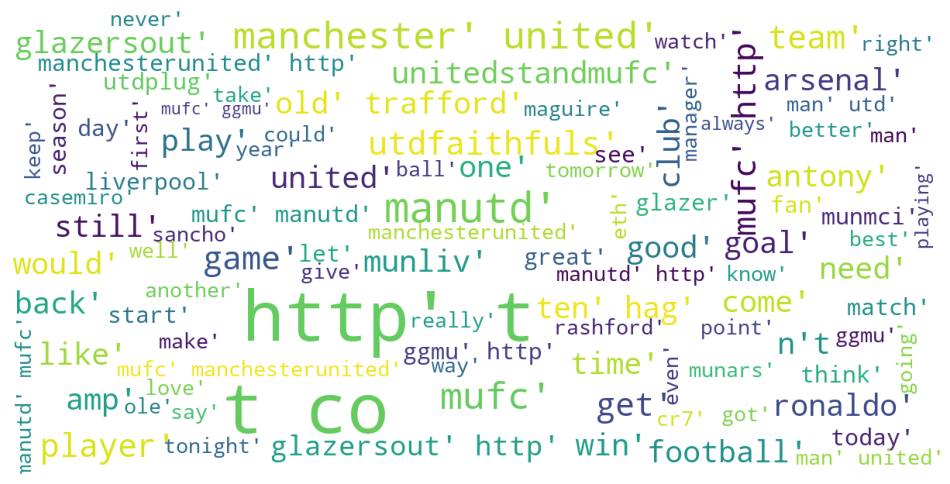

In [ ]:
plot_wordcloud(manuData['content'])

In [41]:
def featureEngineering(tweet):
    # Lower case tweet
    tweetMod = tweet.lower()
    # Replace URLs with a space in the message
    tweetMod = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweetMod)
    # Replace ticker symbols with a space. The ticker symbols are any stock symbol that starts with $.
    tweetMod = re.sub('\$[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace StockTwits usernames with a space. The usernames are any word that starts with @.
    tweetMod = re.sub('\@[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace everything not a letter or apostrophe with a space
    tweetMod = re.sub('[^a-zA-Z\']', ' ', tweetMod)
    # Remove single letter words
    tweetMod = ' '.join([w for w in tweetMod.split() if len(w) > 1])

    return tweetMod


# Process for all tweets
manuData['modTweet'] = [featureEngineering(tweet) for tweet in manuData['content']]

def lemmatizeTweet(tweet):
    words = [word for word in word_tokenize(tweet) if (word.isalpha()==1)]
    # Remove stop words
    stop = set(stopwords.words('english'))
    words = [word for word in words if (word not in stop)]
    # Lemmatize words (first noun, then verb)
    wnl = nltk.stem.WordNetLemmatizer()
    lemmatized = [wnl.lemmatize(wnl.lemmatize(word, 'n'), 'v') for word in words]
    return " ".join(lemmatized)

manuData['lemmatizedText'] = manuData["modTweet"].apply(lambda x:lemmatizeTweet(x))

<>:5: DeprecationWarning: invalid escape sequence \/
<>:7: DeprecationWarning: invalid escape sequence \$
<>:9: DeprecationWarning: invalid escape sequence \@
<>:5: DeprecationWarning: invalid escape sequence \/
<>:7: DeprecationWarning: invalid escape sequence \$
<>:9: DeprecationWarning: invalid escape sequence \@
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/74027555.py:5: DeprecationWarning: invalid escape sequence \/
  tweetMod = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/74027555.py:7: DeprecationWarning: invalid escape sequence \$
  tweetMod = re.sub('\$[a-zA-Z0-9]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/74027555.py:9: DeprecationWarning: invalid escape sequence \@
  tweetMod = re.sub('\@[a-zA-Z0-9]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/74027555.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

[nltk_data] Downloading package stopwords to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


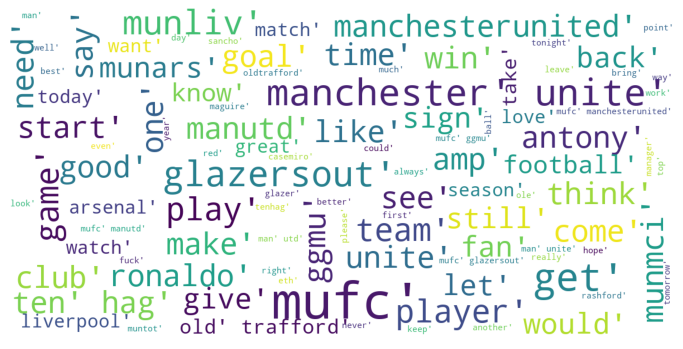

In [42]:
plot_wordcloud(manuData['lemmatizedText'])

False    17287
True       515
Name: verified, dtype: int64


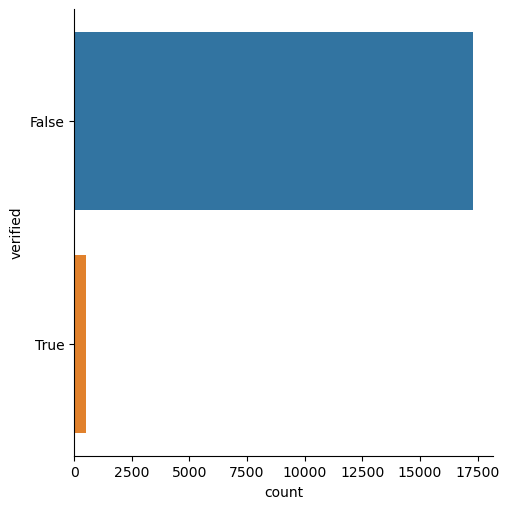

In [ ]:
print(manuData["verified"].value_counts())
sb.catplot(y = "verified", data = manuData, kind = "count")

Argentina         6231
United States     4329
India             3412
South Africa       576
Ireland            492
Australia          491
Brazil             464
Egypt              429
Singapore          353
Belgium            200
Norway             161
United Kingdom     146
Sweden             103
Mexico              82
Nigeria             77
Germany             61
South Korea         57
Spain               50
Uruguay             47
Netherlands         18
Canada              14
New Zealand          8
Italy                1
Name: country, dtype: int64


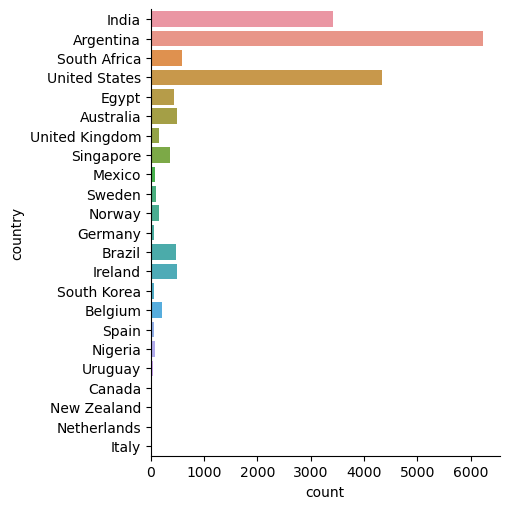

In [ ]:
print(manuData["country"].value_counts())
sb.catplot(y = "country", data = manuData, kind = "count")

 1    6987
-1    5529
 0    5286
Name: final_class, dtype: int64


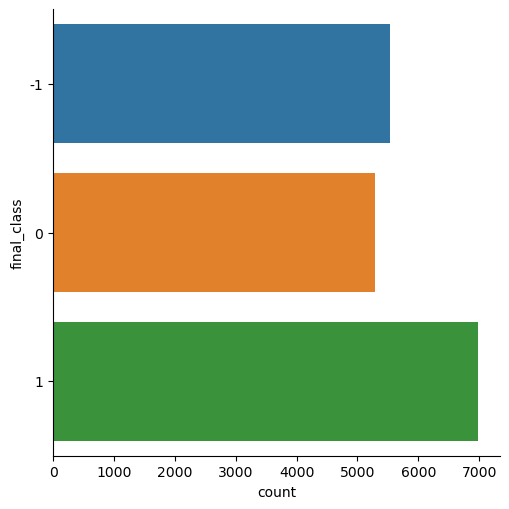

In [ ]:
print(manuData["final_class"].value_counts())
sb.catplot(y = "final_class", data = manuData, kind = "count")

## Manchester City

<AxesSubplot:>

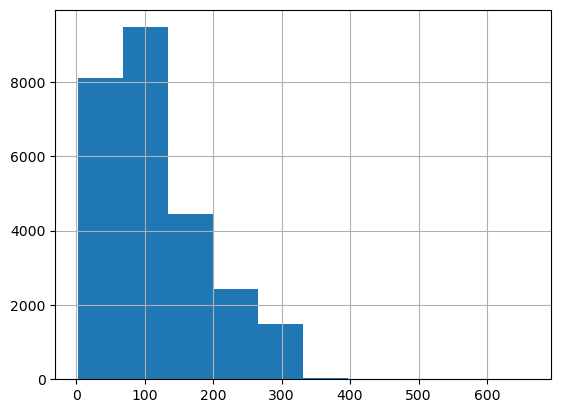

In [ ]:
mancData['content'].str.len().hist()

<AxesSubplot:>

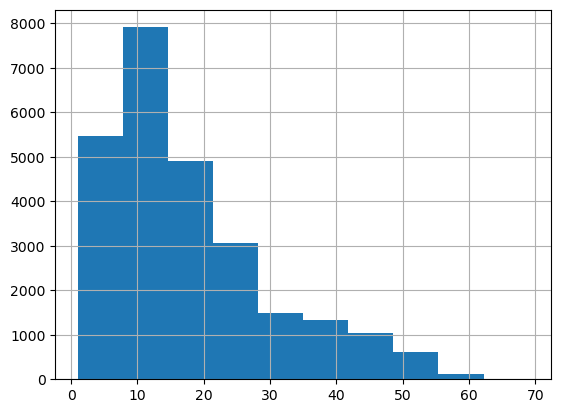

In [ ]:
mancData['content'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

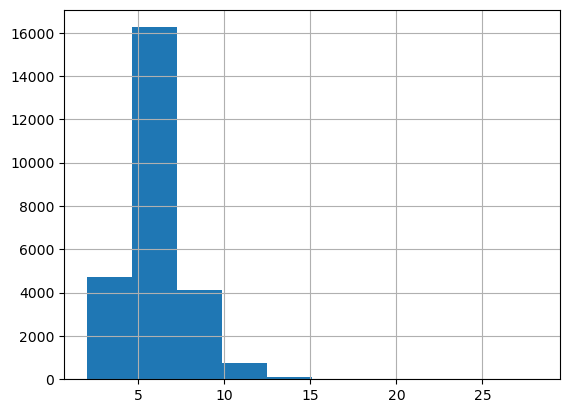

In [ ]:
mancData['content'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

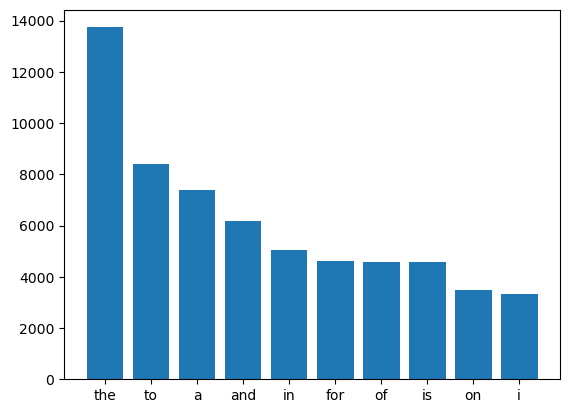

In [ ]:
# Plot the occurances of the most common stopwords in the dataset - create the corpus
corpus=[]
check= mancData['content'].str.split()
check=check.values.tolist()
corpus=[word for i in check for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
mtplt.bar(x,y)
mtplt.show()

<AxesSubplot:>

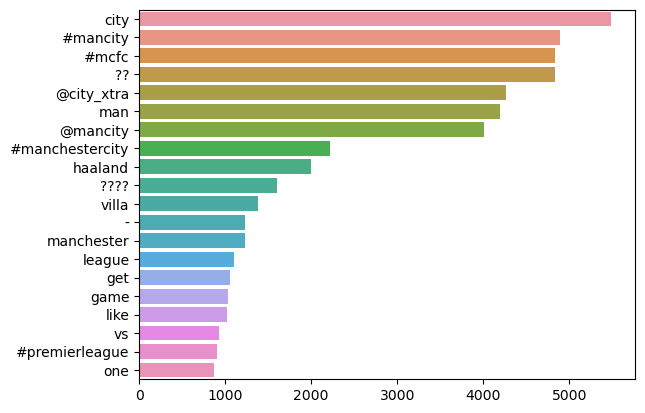

In [ ]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:60]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sb.barplot(x=y,y=x)

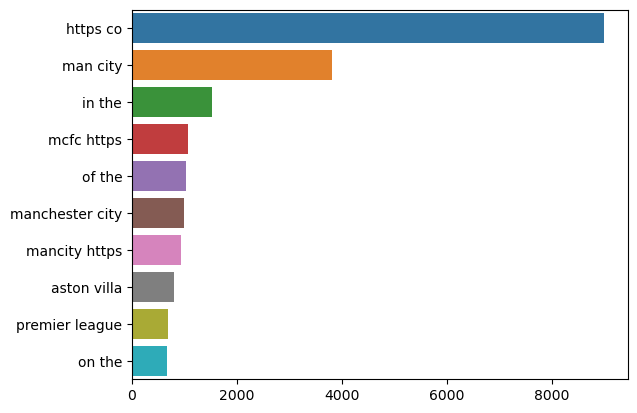

In [ ]:
plot_top_ngrams_barchart(mancData['content'],2)

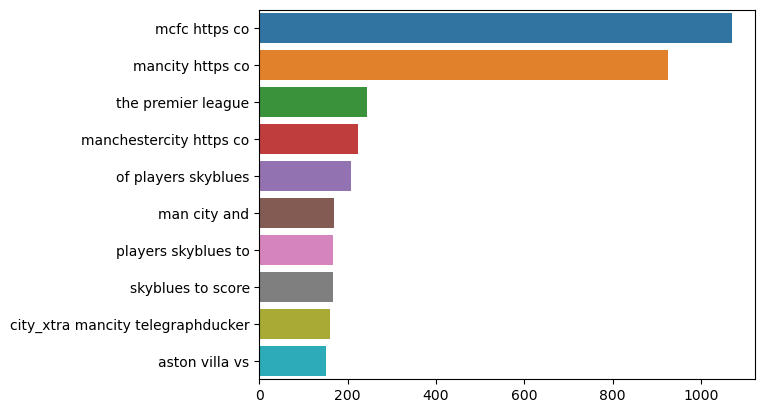

In [ ]:
plot_top_ngrams_barchart(mancData['content'],3)

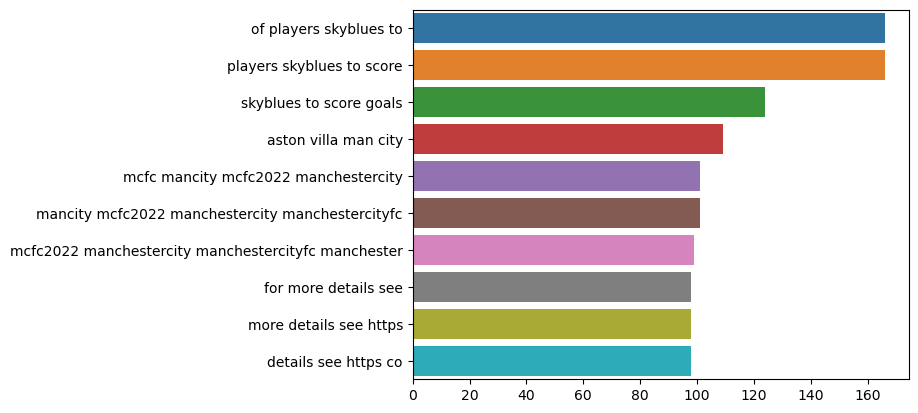

In [ ]:
plot_top_ngrams_barchart(mancData['content'],4)

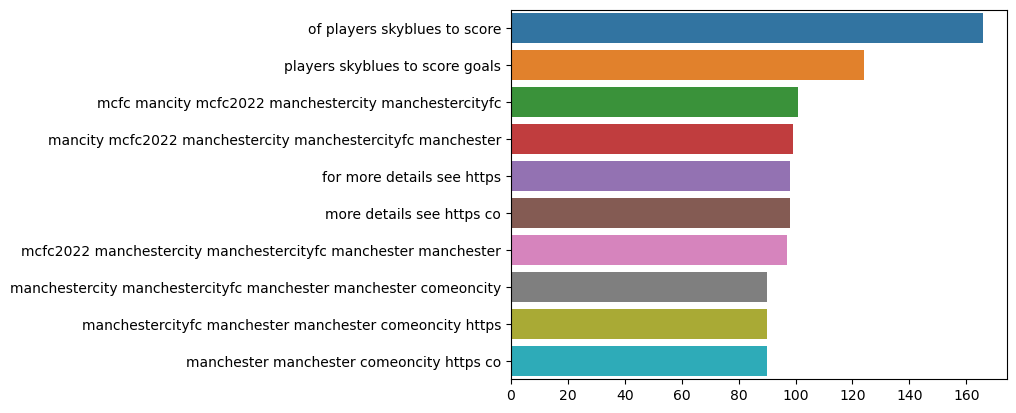

In [ ]:
plot_top_ngrams_barchart(mancData['content'],5)

In [12]:
lda_model, bow_corpus, dic = get_lda_objects(mancData['content'])

[nltk_data] Downloading package stopwords to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
lda_model.show_topics()

[(0,
  '0.086*"city_xtra" + 0.024*"mancity" + 0.015*"player" + 0.013*"erlinghaaland" + 0.012*"goal" + 0.012*"skyblues" + 0.010*"score" + 0.009*"n\'t" + 0.007*"point" + 0.007*"got"'),
 (1,
  '0.015*"statcity" + 0.014*"mancity" + 0.012*"mcfc" + 0.010*"one" + 0.010*"club" + 0.009*"game" + 0.007*"player" + 0.007*"http" + 0.007*"great" + 0.007*"n\'t"'),
 (2,
  '0.050*"http" + 0.037*"mancity" + 0.028*"city" + 0.026*"mcfc" + 0.022*"manchestercity" + 0.013*"ucl" + 0.010*"man" + 0.009*"realmadrid" + 0.008*"mancityus" + 0.008*"manchester"'),
 (3,
  '0.070*"haaland" + 0.068*"mancity" + 0.035*"goal" + 0.024*"mcfc" + 0.020*"http" + 0.014*"erling" + 0.011*"game" + 0.011*"alvarez" + 0.010*"erlinghaaland" + 0.009*"premierleague"'),
 (4,
  '0.034*"http" + 0.023*"mancity" + 0.018*"mcfc" + 0.013*"time" + 0.010*"manchestercity" + 0.010*"city" + 0.007*"get" + 0.007*"red" + 0.006*"football" + 0.006*"fan"'),
 (5,
  '0.074*"city" + 0.059*"http" + 0.044*"man" + 0.033*"mcfc" + 0.031*"villa" + 0.027*"manchester"

In [14]:
# Can adjust the metric value, as well as the topics
p = plot_lda_vis(lda_model, bow_corpus, dic)
pyLDAvis.save_html(p, '../UI/manc_lda.html')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aishwarya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


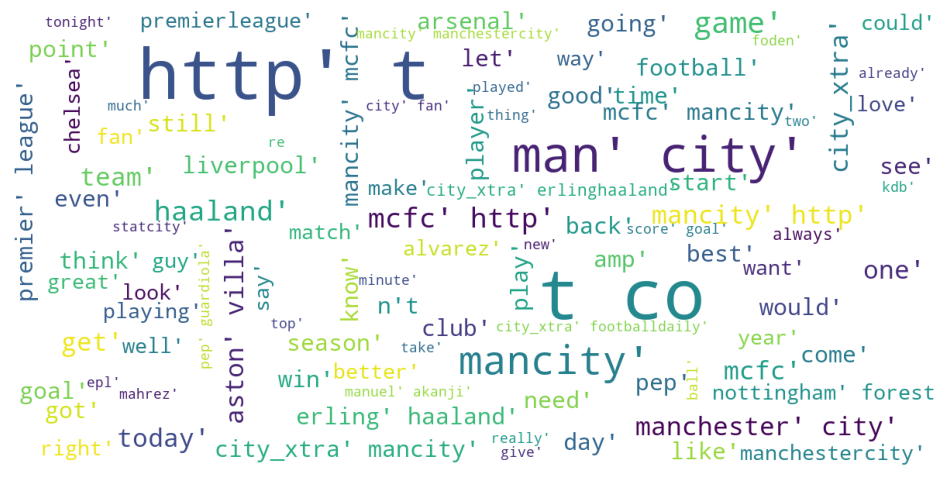

In [ ]:
plot_wordcloud(mancData['content'])

<>:5: DeprecationWarning: invalid escape sequence \/
<>:7: DeprecationWarning: invalid escape sequence \$
<>:9: DeprecationWarning: invalid escape sequence \@
<>:5: DeprecationWarning: invalid escape sequence \/
<>:7: DeprecationWarning: invalid escape sequence \$
<>:9: DeprecationWarning: invalid escape sequence \@
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/783001724.py:5: DeprecationWarning: invalid escape sequence \/
  tweetMod = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/783001724.py:7: DeprecationWarning: invalid escape sequence \$
  tweetMod = re.sub('\$[a-zA-Z0-9]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/783001724.py:9: DeprecationWarning: invalid escape sequence \@
  tweetMod = re.sub('\@[a-zA-Z0-9]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/783001724.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

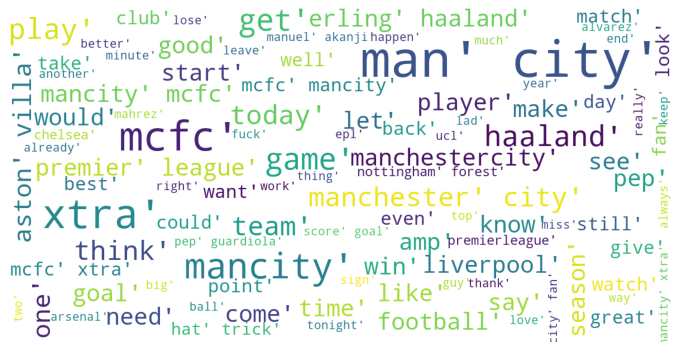

In [44]:
def featureEngineering(tweet):
    # Lower case tweet
    tweetMod = tweet.lower()
    # Replace URLs with a space in the message
    tweetMod = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweetMod)
    # Replace ticker symbols with a space. The ticker symbols are any stock symbol that starts with $.
    tweetMod = re.sub('\$[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace StockTwits usernames with a space. The usernames are any word that starts with @.
    tweetMod = re.sub('\@[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace everything not a letter or apostrophe with a space
    tweetMod = re.sub('[^a-zA-Z\']', ' ', tweetMod)
    # Remove single letter words
    tweetMod = ' '.join([w for w in tweetMod.split() if len(w) > 1])

    return tweetMod


# Process for all tweets
mancData['modTweet'] = [featureEngineering(tweet) for tweet in mancData['content']]

def lemmatizeTweet(tweet):
    words = [word for word in word_tokenize(tweet) if (word.isalpha()==1)]
    # Remove stop words
    stop = set(stopwords.words('english'))
    words = [word for word in words if (word not in stop)]
    # Lemmatize words (first noun, then verb)
    wnl = nltk.stem.WordNetLemmatizer()
    lemmatized = [wnl.lemmatize(wnl.lemmatize(word, 'n'), 'v') for word in words]
    return " ".join(lemmatized)

mancData['lemmatizedText'] = mancData["modTweet"].apply(lambda x:lemmatizeTweet(x))

plot_wordcloud(mancData['lemmatizedText'])

False    24546
True      1437
Name: verified, dtype: int64


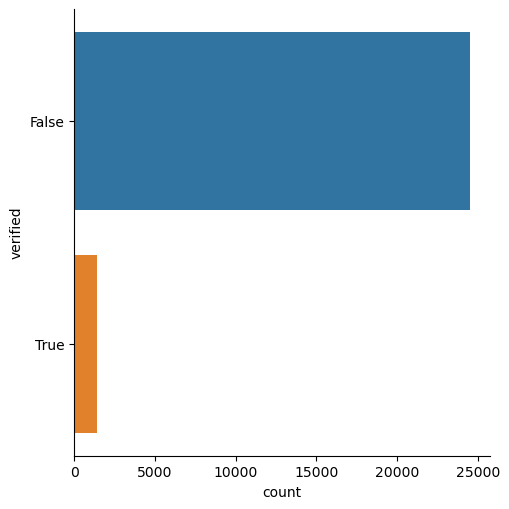

In [ ]:
print(mancData["verified"].value_counts())
sb.catplot(y = "verified", data = mancData, kind = "count")

Denmark          6675
Argentina        6259
Australia        4345
United States    4234
India            1755
South Africa     1044
Brazil            790
France            191
Singapore         126
Italy             102
Uruguay            90
Belgium            85
Switzerland        83
Canada             74
Mexico             55
South Korea        46
Croatia            23
New Zealand         4
Netherlands         2
Name: country, dtype: int64


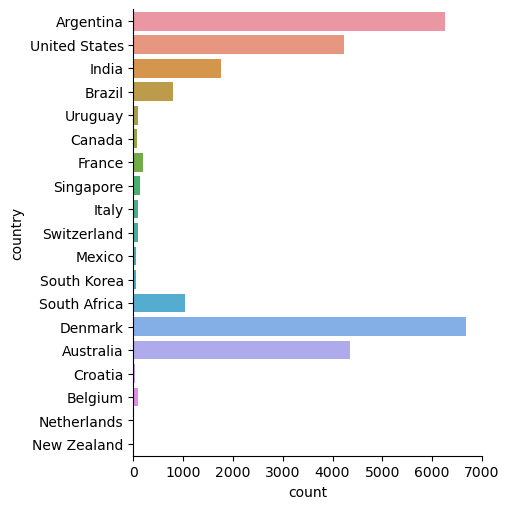

In [ ]:
print(mancData["country"].value_counts())
sb.catplot(y = "country", data = mancData, kind = "count")

 0    9581
 1    8534
-1    7868
Name: final_class, dtype: int64


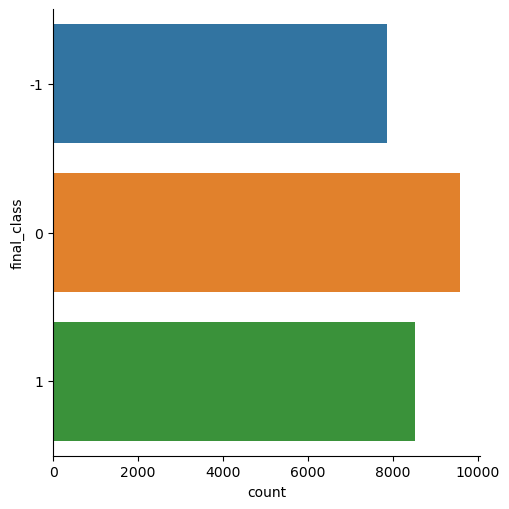

In [ ]:
print(mancData["final_class"].value_counts())
sb.catplot(y = "final_class", data = mancData, kind = "count")

## Chelsea

<AxesSubplot:>

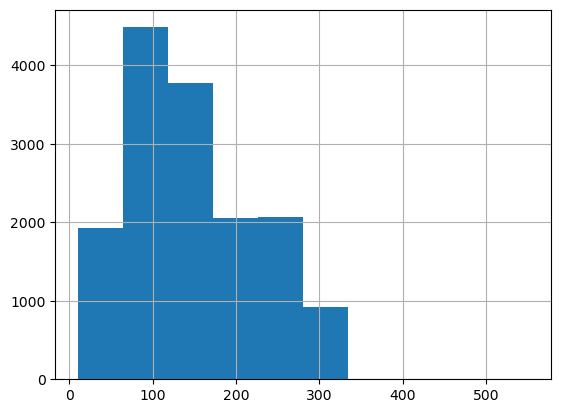

In [ ]:
chelseaData['content'].str.len().hist()

<AxesSubplot:>

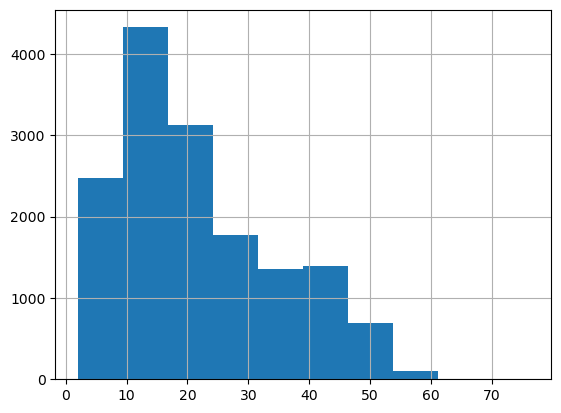

In [ ]:
chelseaData['content'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

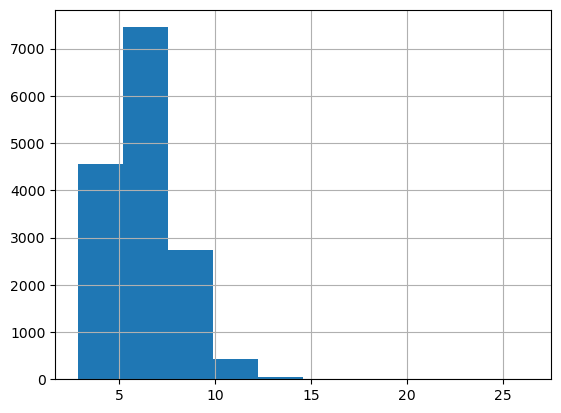

In [ ]:
chelseaData['content'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

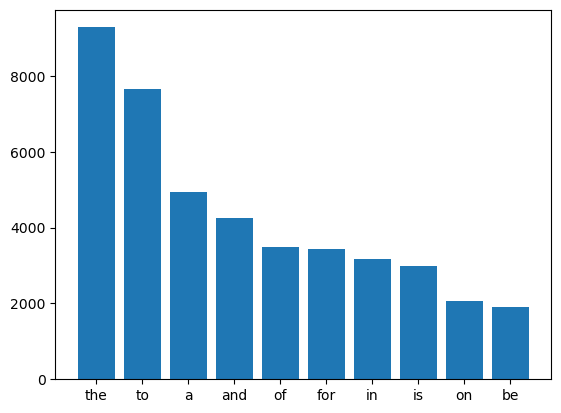

In [ ]:
# Plot the occurances of the most common stopwords in the dataset - create the corpus
corpus=[]
check= chelseaData['content'].str.split()
check=check.values.tolist()
corpus=[word for i in check for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
mtplt.bar(x,y)
mtplt.show()

<AxesSubplot:>

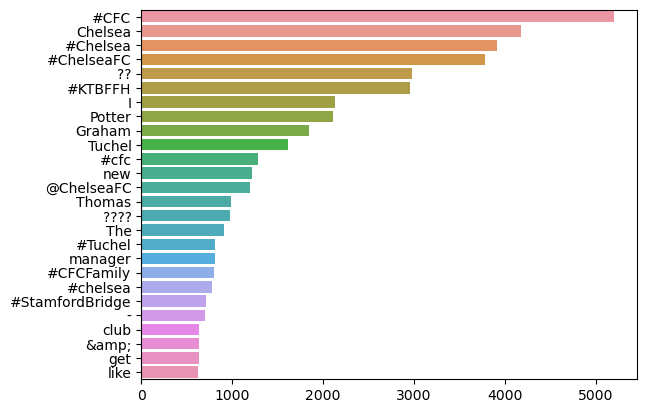

In [ ]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:60]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sb.barplot(x=y,y=x)

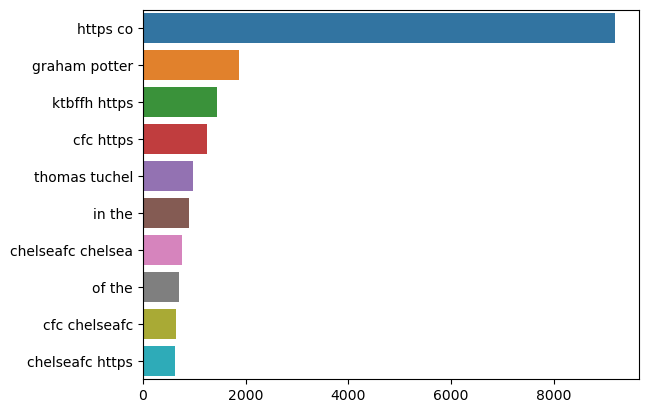

In [ ]:
plot_top_ngrams_barchart(chelseaData['content'],2)

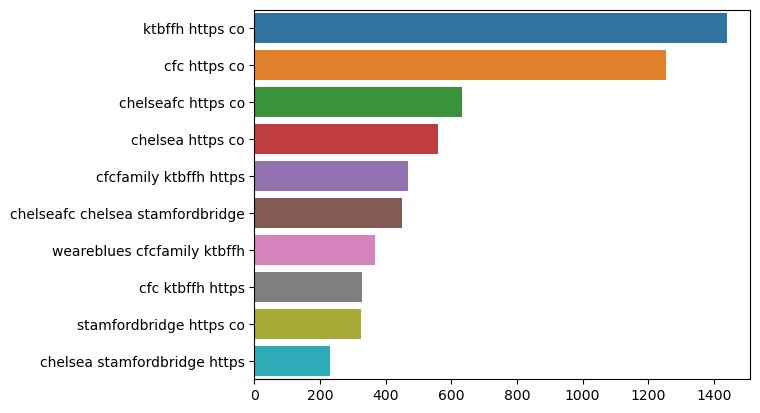

In [ ]:
plot_top_ngrams_barchart(chelseaData['content'],3)

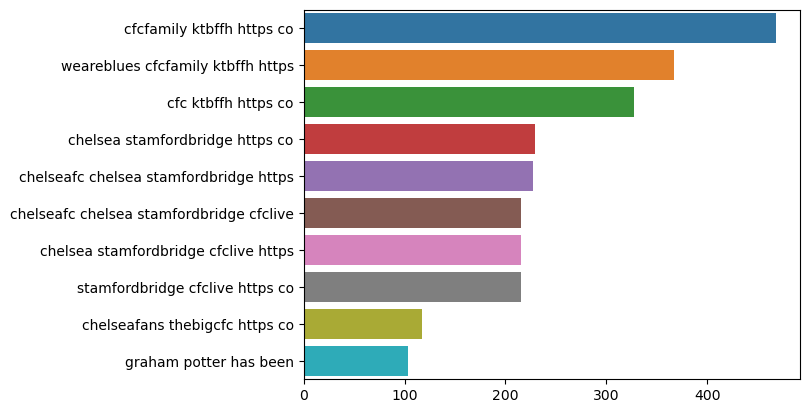

In [ ]:
plot_top_ngrams_barchart(chelseaData['content'],4)

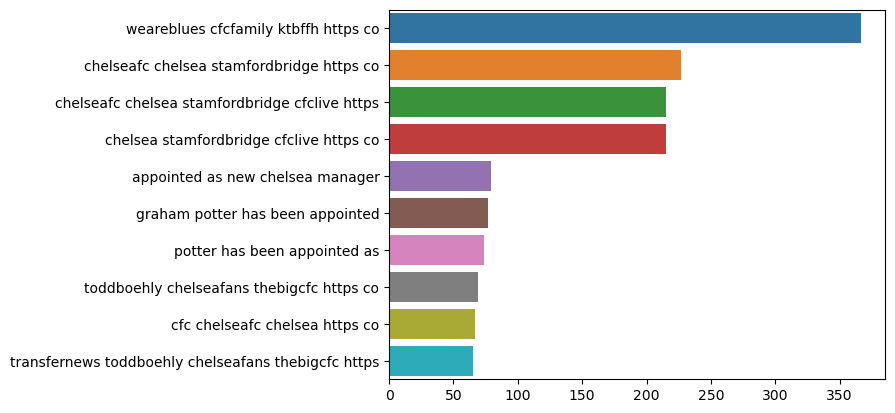

In [ ]:
plot_top_ngrams_barchart(chelseaData['content'],5)

In [15]:
lda_model, bow_corpus, dic = get_lda_objects(chelseaData['content'])

[nltk_data] Downloading package stopwords to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
lda_model.show_topics()

[(0,
  '0.042*"http" + 0.039*"Chelsea" + 0.026*"KTBFFH" + 0.020*"ChelseaFC" + 0.014*"CFC" + 0.009*"Bridge" + 0.008*"Cup" + 0.008*"League" + 0.007*"Stamford" + 0.007*"goal"'),
 (1,
  '0.036*"chelsea" + 0.035*"chelseafc" + 0.033*"http" + 0.025*"cfc" + 0.019*"stamfordbridge" + 0.017*"ktbffh" + 0.015*"chelseafans" + 0.011*"premierleague" + 0.009*"football" + 0.009*"ChelseaFC"'),
 (2,
  '0.029*"Chelsea" + 0.025*"CFC" + 0.023*"Tuchel" + 0.015*"ChelseaFC" + 0.012*"club" + 0.011*"player" + 0.011*"http" + 0.010*"n\'t" + 0.010*"fan" + 0.010*"time"'),
 (3,
  '0.057*"Potter" + 0.038*"http" + 0.038*"Chelsea" + 0.036*"Graham" + 0.031*"ChelseaFC" + 0.027*"CFC" + 0.016*"Brighton" + 0.012*"cfc" + 0.010*"Welcome" + 0.010*"manager"'),
 (4,
  '0.027*"KTBFFH" + 0.027*"Chelsea" + 0.022*"http" + 0.017*"CFC" + 0.011*"Come" + 0.009*"win" + 0.008*"ChelseaFC" + 0.007*"game" + 0.005*"league" + 0.005*"UCL"'),
 (5,
  '0.024*"CFC" + 0.012*"Boehly" + 0.012*"http" + 0.011*"Chelsea" + 0.011*"Pochettino" + 0.008*"Zidane

In [17]:
# Can adjust the metric value, as well as the topics
p = plot_lda_vis(lda_model, bow_corpus, dic)
pyLDAvis.save_html(p, '../UI/chelsea_lda.html')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aishwarya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


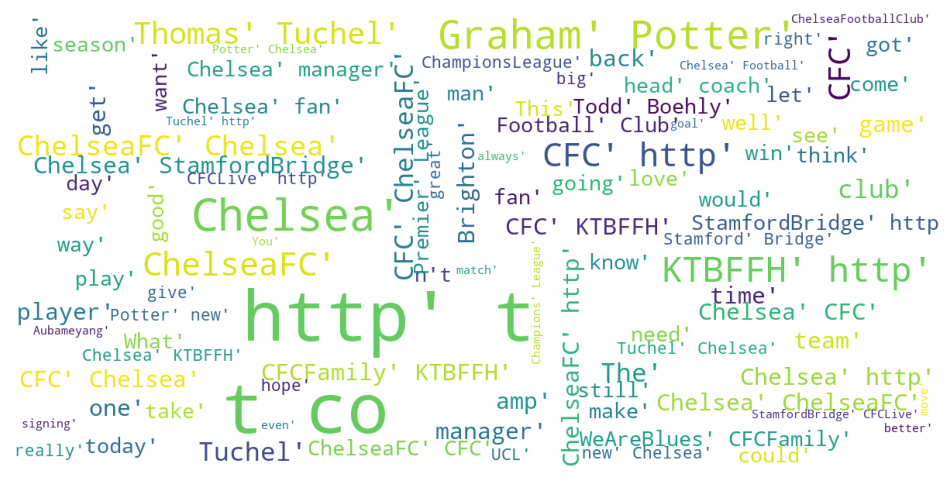

In [ ]:
plot_wordcloud(chelseaData['content'])

<>:5: DeprecationWarning: invalid escape sequence \/
<>:7: DeprecationWarning: invalid escape sequence \$
<>:9: DeprecationWarning: invalid escape sequence \@
<>:5: DeprecationWarning: invalid escape sequence \/
<>:7: DeprecationWarning: invalid escape sequence \$
<>:9: DeprecationWarning: invalid escape sequence \@
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/3238642459.py:5: DeprecationWarning: invalid escape sequence \/
  tweetMod = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/3238642459.py:7: DeprecationWarning: invalid escape sequence \$
  tweetMod = re.sub('\$[a-zA-Z0-9]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/3238642459.py:9: DeprecationWarning: invalid escape sequence \@
  tweetMod = re.sub('\@[a-zA-Z0-9]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/3238642459.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

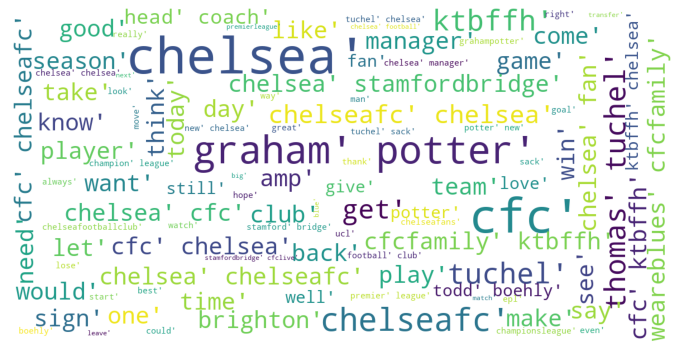

In [46]:
def featureEngineering(tweet):
    # Lower case tweet
    tweetMod = tweet.lower()
    # Replace URLs with a space in the message
    tweetMod = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweetMod)
    # Replace ticker symbols with a space. The ticker symbols are any stock symbol that starts with $.
    tweetMod = re.sub('\$[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace StockTwits usernames with a space. The usernames are any word that starts with @.
    tweetMod = re.sub('\@[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace everything not a letter or apostrophe with a space
    tweetMod = re.sub('[^a-zA-Z\']', ' ', tweetMod)
    # Remove single letter words
    tweetMod = ' '.join([w for w in tweetMod.split() if len(w) > 1])

    return tweetMod


# Process for all tweets
chelseaData['modTweet'] = [featureEngineering(tweet) for tweet in chelseaData['content']]

def lemmatizeTweet(tweet):
    words = [word for word in word_tokenize(tweet) if (word.isalpha()==1)]
    # Remove stop words
    stop = set(stopwords.words('english'))
    words = [word for word in words if (word not in stop)]
    # Lemmatize words (first noun, then verb)
    wnl = nltk.stem.WordNetLemmatizer()
    lemmatized = [wnl.lemmatize(wnl.lemmatize(word, 'n'), 'v') for word in words]
    return " ".join(lemmatized)

chelseaData['lemmatizedText'] = chelseaData["modTweet"].apply(lambda x:lemmatizeTweet(x))

plot_wordcloud(chelseaData['lemmatizedText'])

False    14560
True       679
Name: verified, dtype: int64


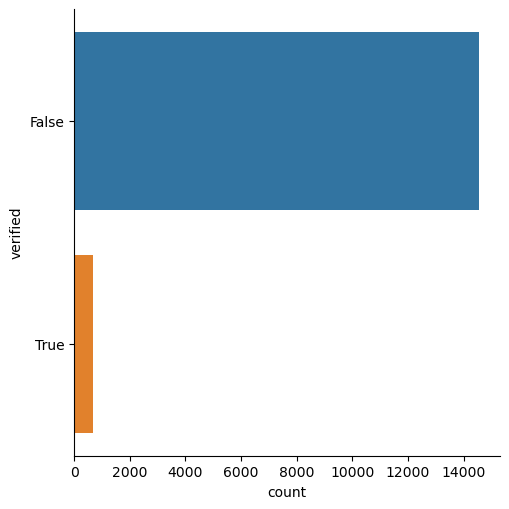

In [ ]:
print(chelseaData["verified"].value_counts())
sb.catplot(y = "verified", data = chelseaData, kind = "count")

Argentina              6282
Zimbabwe               3183
United States          3089
India                  1246
Kenya                   601
Japan                   250
Australia               220
Germany                 211
Brazil                   96
Peru                     23
Trinidad and Tobago      21
South Korea               5
Mexico                    4
France                    4
New Zealand               2
El Salvador               1
South Africa              1
Name: country, dtype: int64


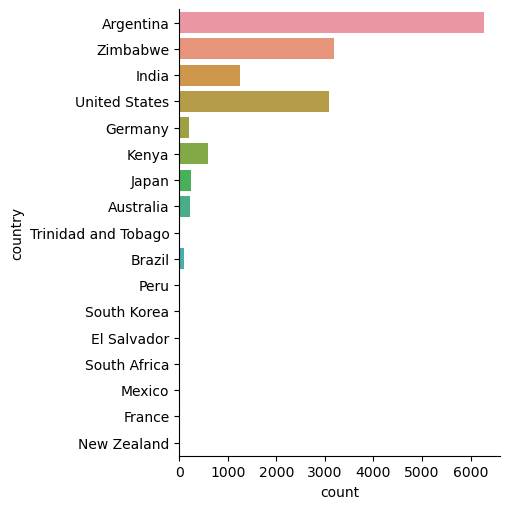

In [ ]:
print(chelseaData["country"].value_counts())
sb.catplot(y = "country", data = chelseaData, kind = "count")

 1    5477
-1    4888
 0    4874
Name: final_class, dtype: int64


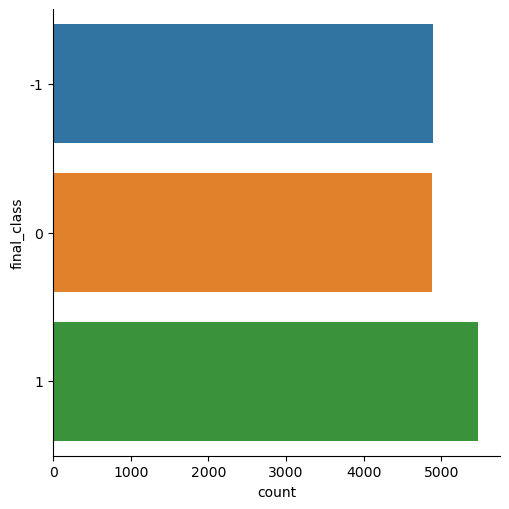

In [ ]:
print(chelseaData["final_class"].value_counts())
sb.catplot(y = "final_class", data = chelseaData, kind = "count")

## Arsenal

<AxesSubplot:>

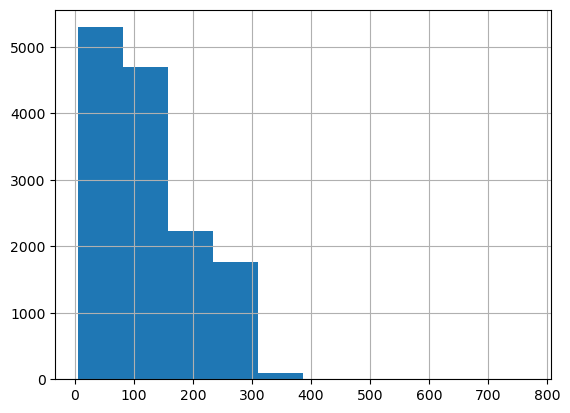

In [ ]:
arsenalData['content'].str.len().hist()

<AxesSubplot:>

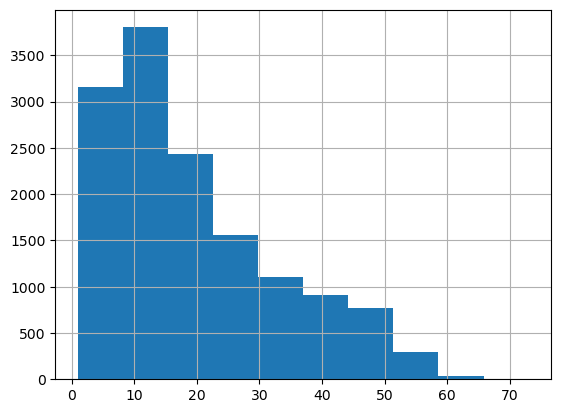

In [ ]:
arsenalData['content'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

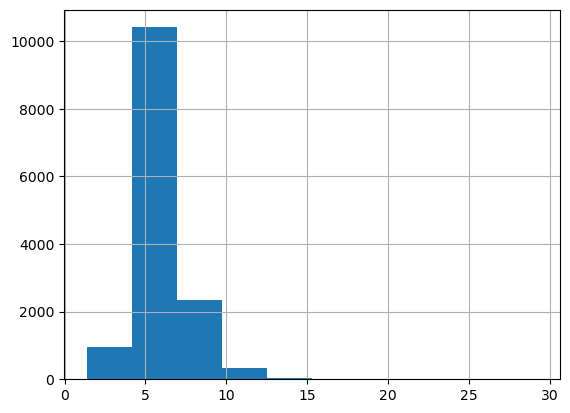

In [ ]:
arsenalData['content'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

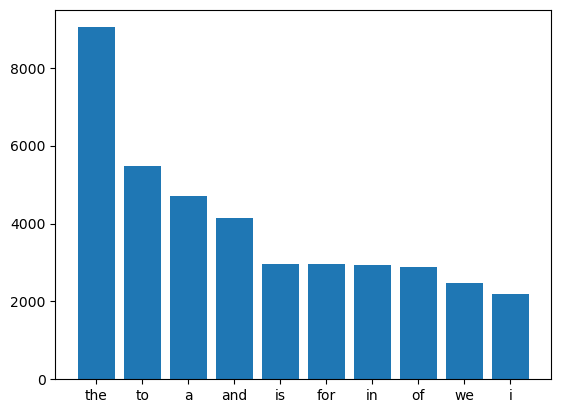

In [ ]:
# Plot the occurances of the most common stopwords in the dataset - create the corpus
corpus=[]
check= arsenalData['content'].str.split()
check=check.values.tolist()
corpus=[word for i in check for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
mtplt.bar(x,y)
mtplt.show()

<AxesSubplot:>

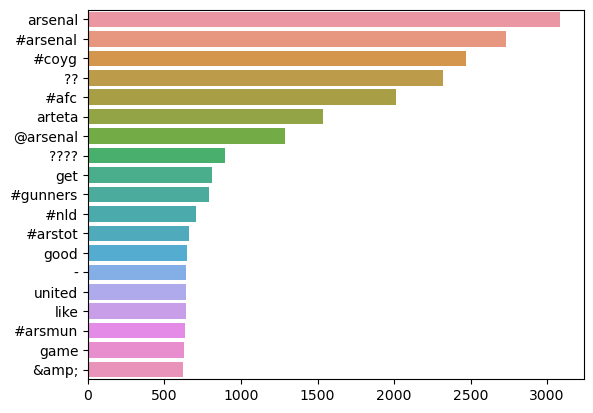

In [ ]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:60]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sb.barplot(x=y,y=x)

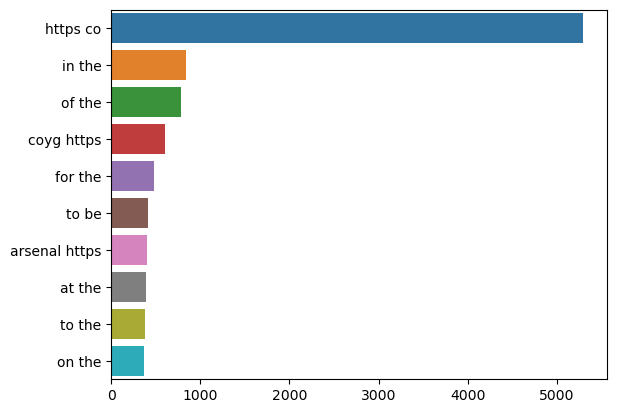

In [ ]:
plot_top_ngrams_barchart(arsenalData['content'],2)

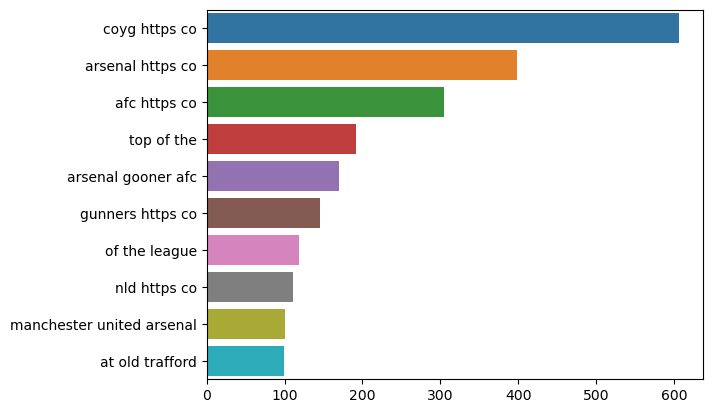

In [ ]:
plot_top_ngrams_barchart(arsenalData['content'],3)

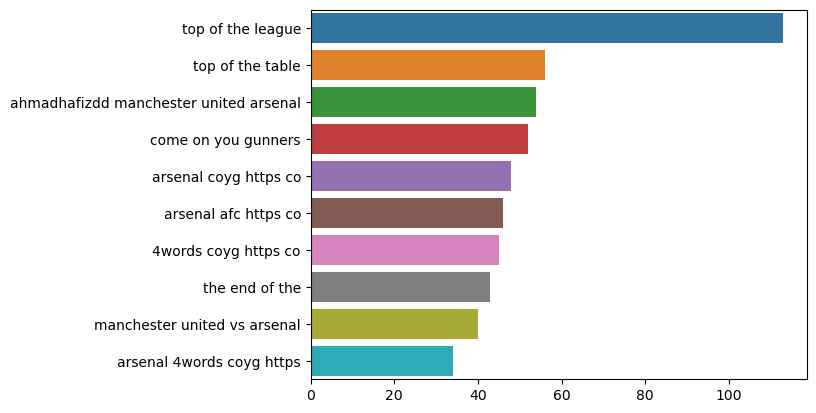

In [ ]:
plot_top_ngrams_barchart(arsenalData['content'],4)

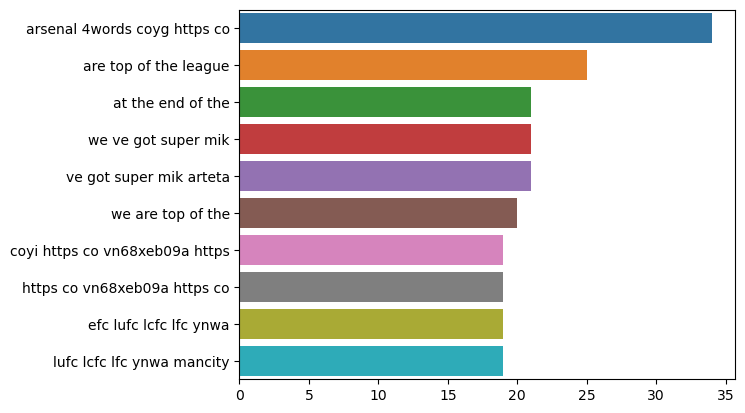

In [ ]:
plot_top_ngrams_barchart(arsenalData['content'],5)

In [18]:
lda_model, bow_corpus, dic = get_lda_objects(arsenalData['content'])

[nltk_data] Downloading package stopwords to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
lda_model.show_topics()

[(0,
  '0.051*"nld" + 0.037*"http" + 0.031*"arstot" + 0.017*"coyg" + 0.017*"coys" + 0.010*"totars" + 0.008*"spur" + 0.008*"arsenal" + 0.008*"day" + 0.007*"great"'),
 (1,
  '0.069*"arsenal" + 0.030*"coyg" + 0.029*"http" + 0.016*"win" + 0.012*"tomorrow" + 0.012*"game" + 0.011*"point" + 0.010*"man" + 0.008*"league" + 0.008*"afc"'),
 (2,
  '0.032*"http" + 0.027*"arsmun" + 0.022*"afc" + 0.007*"nfl" + 0.006*"penalty" + 0.006*"arsenal" + 0.005*"game" + 0.005*"2022" + 0.005*"one" + 0.004*"well"'),
 (3,
  '0.054*"arsenal" + 0.025*"http" + 0.024*"afc" + 0.018*"united" + 0.011*"manchester" + 0.010*"arsmun" + 0.009*"coyg" + 0.009*"fan" + 0.008*"like" + 0.007*"goal"'),
 (4,
  '0.073*"http" + 0.046*"arsenal" + 0.031*"coyg" + 0.017*"afc" + 0.013*"london" + 0.010*"gunner" + 0.010*"arsenalfc" + 0.008*"north" + 0.006*"league" + 0.005*"stadium"'),
 (5,
  '0.066*"arsenal" + 0.032*"http" + 0.024*"coyg" + 0.020*"gunner" + 0.015*"team" + 0.015*"afc" + 0.013*"gooners" + 0.010*"good" + 0.008*"best" + 0.007*"wi

In [20]:
# Can adjust the metric value, as well as the topics
p = plot_lda_vis(lda_model, bow_corpus, dic)
pyLDAvis.save_html(p, '../UI/arsenal_lda.html')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aishwarya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


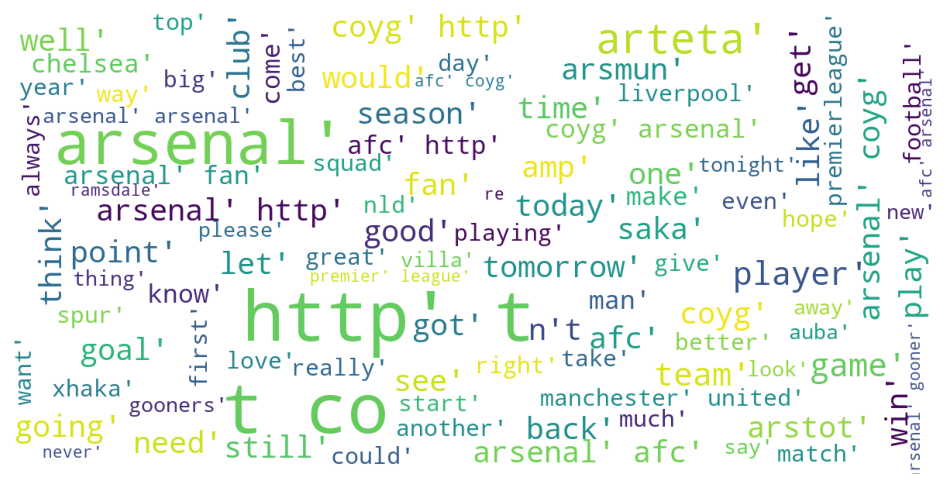

In [ ]:
plot_wordcloud(arsenalData['content'])

<>:5: DeprecationWarning: invalid escape sequence \/
<>:7: DeprecationWarning: invalid escape sequence \$
<>:9: DeprecationWarning: invalid escape sequence \@
<>:5: DeprecationWarning: invalid escape sequence \/
<>:7: DeprecationWarning: invalid escape sequence \$
<>:9: DeprecationWarning: invalid escape sequence \@
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/3542218284.py:5: DeprecationWarning: invalid escape sequence \/
  tweetMod = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/3542218284.py:7: DeprecationWarning: invalid escape sequence \$
  tweetMod = re.sub('\$[a-zA-Z0-9]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/3542218284.py:9: DeprecationWarning: invalid escape sequence \@
  tweetMod = re.sub('\@[a-zA-Z0-9]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/3542218284.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

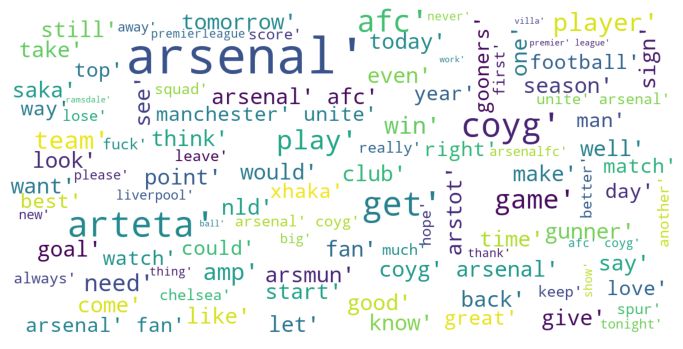

In [47]:
def featureEngineering(tweet):
    # Lower case tweet
    tweetMod = tweet.lower()
    # Replace URLs with a space in the message
    tweetMod = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweetMod)
    # Replace ticker symbols with a space. The ticker symbols are any stock symbol that starts with $.
    tweetMod = re.sub('\$[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace StockTwits usernames with a space. The usernames are any word that starts with @.
    tweetMod = re.sub('\@[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace everything not a letter or apostrophe with a space
    tweetMod = re.sub('[^a-zA-Z\']', ' ', tweetMod)
    # Remove single letter words
    tweetMod = ' '.join([w for w in tweetMod.split() if len(w) > 1])

    return tweetMod


# Process for all tweets
arsenalData['modTweet'] = [featureEngineering(tweet) for tweet in arsenalData['content']]

def lemmatizeTweet(tweet):
    words = [word for word in word_tokenize(tweet) if (word.isalpha()==1)]
    # Remove stop words
    stop = set(stopwords.words('english'))
    words = [word for word in words if (word not in stop)]
    # Lemmatize words (first noun, then verb)
    wnl = nltk.stem.WordNetLemmatizer()
    lemmatized = [wnl.lemmatize(wnl.lemmatize(word, 'n'), 'v') for word in words]
    return " ".join(lemmatized)

arsenalData['lemmatizedText'] = arsenalData["modTweet"].apply(lambda x:lemmatizeTweet(x))

plot_wordcloud(arsenalData['lemmatizedText'])

False    13690
True       381
Name: verified, dtype: int64


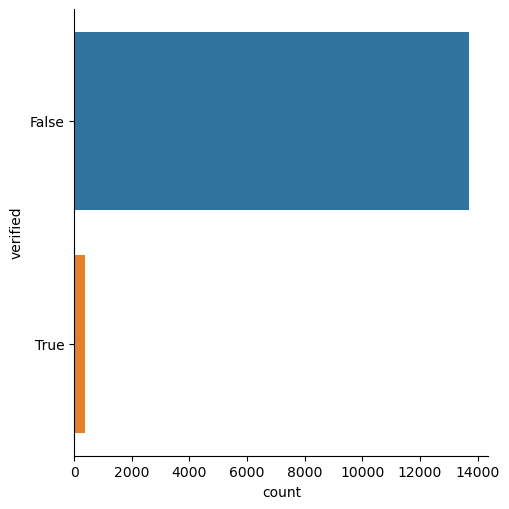

In [ ]:
print(arsenalData["verified"].value_counts())
sb.catplot(y = "verified", data = arsenalData, kind = "count")

Argentina         5533
United States     3449
India             2457
New Zealand        983
Brazil             817
South Africa       301
Australia          174
Egypt               80
Singapore           72
Uruguay             52
South Korea         39
Sweden              33
France              28
Mexico              27
United Kingdom      17
Belgium              3
Nigeria              2
Norway               1
Canada               1
Ireland              1
Netherlands          1
Name: country, dtype: int64


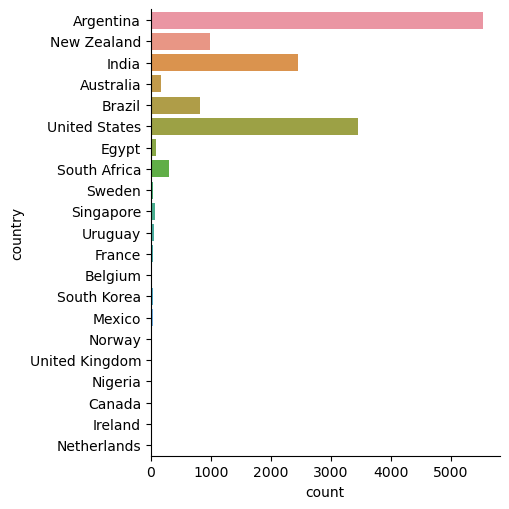

In [ ]:
print(arsenalData["country"].value_counts())
sb.catplot(y = "country", data = arsenalData, kind = "count")

 1    5388
-1    4602
 0    4081
Name: final_class, dtype: int64


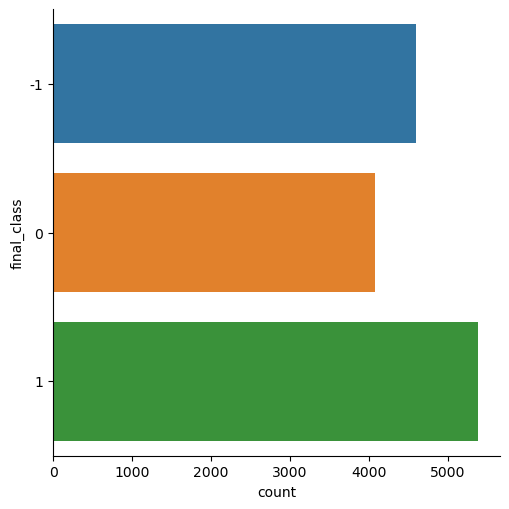

In [ ]:
print(arsenalData["final_class"].value_counts())
sb.catplot(y = "final_class", data = arsenalData, kind = "count")

## Liverpool

<AxesSubplot:>

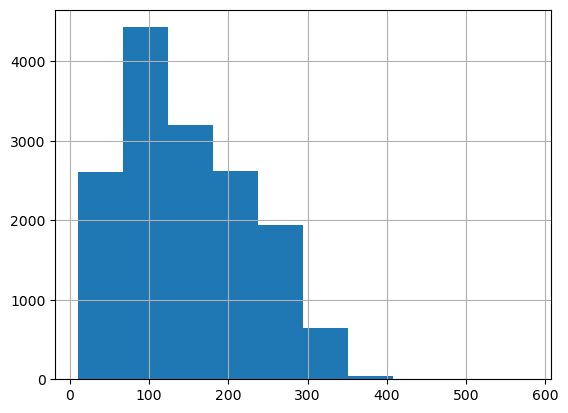

In [ ]:
liverpoolData['content'].str.len().hist()

<AxesSubplot:>

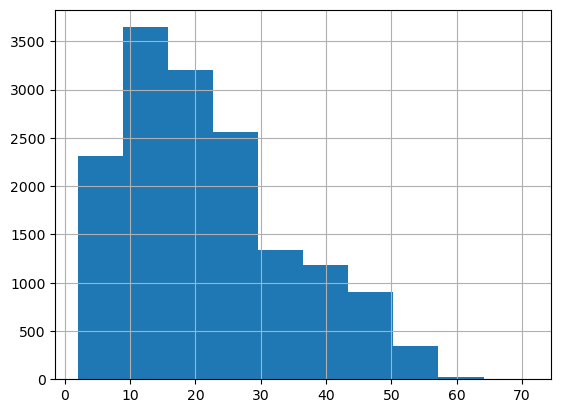

In [ ]:
liverpoolData['content'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

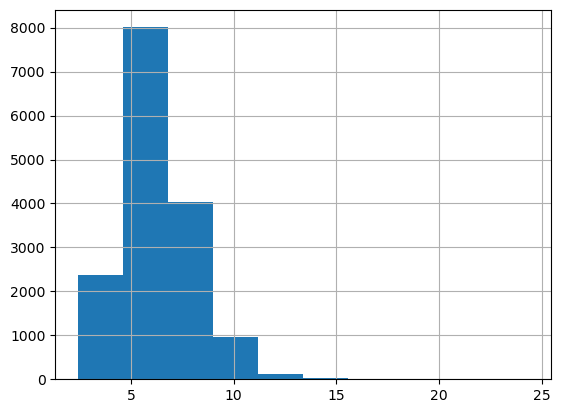

In [ ]:
liverpoolData['content'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

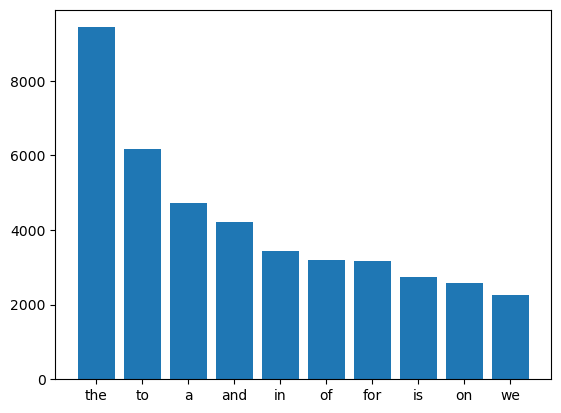

In [ ]:
# Plot the occurances of the most common stopwords in the dataset - create the corpus
corpus=[]
check= liverpoolData['content'].str.split()
check=check.values.tolist()
corpus=[word for i in check for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
mtplt.bar(x,y)
mtplt.show()

<AxesSubplot:>

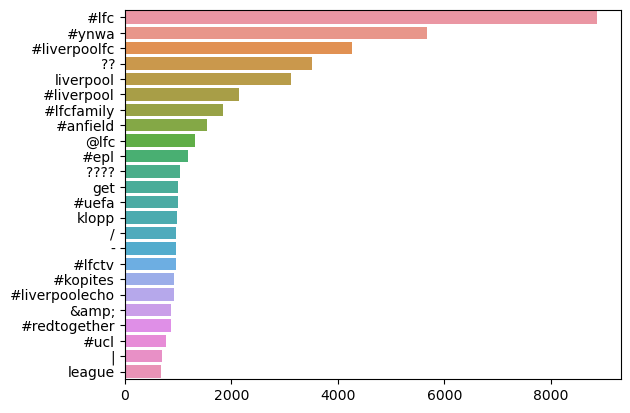

In [ ]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:60]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sb.barplot(x=y,y=x)

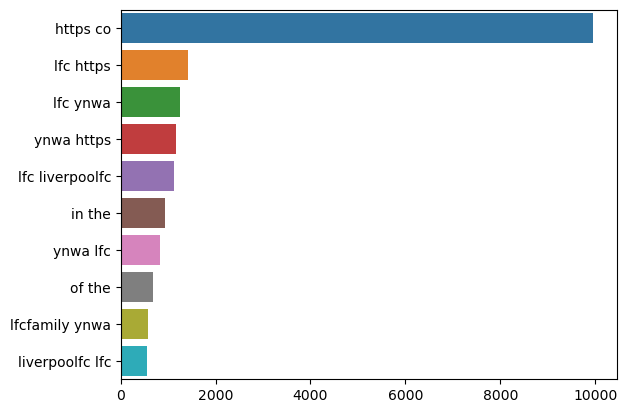

In [ ]:
plot_top_ngrams_barchart(liverpoolData['content'],2)

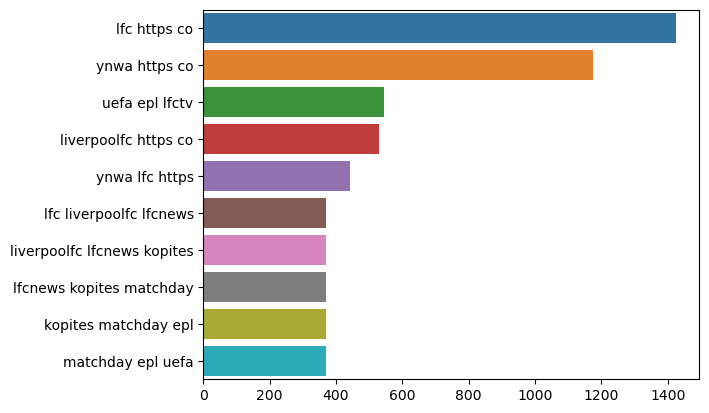

In [ ]:
plot_top_ngrams_barchart(liverpoolData['content'],3)

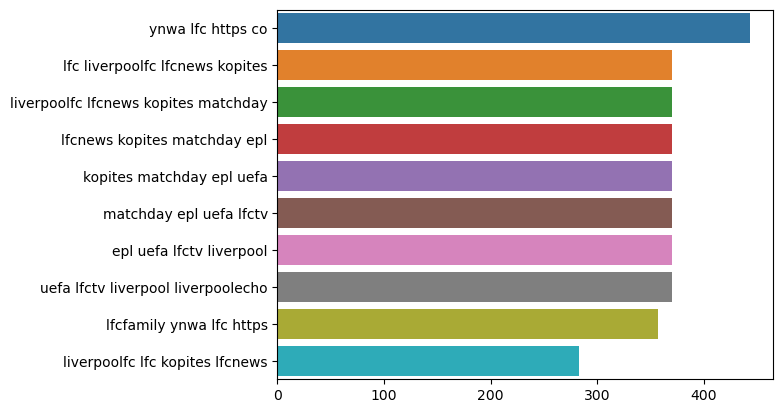

In [ ]:
plot_top_ngrams_barchart(liverpoolData['content'],4)

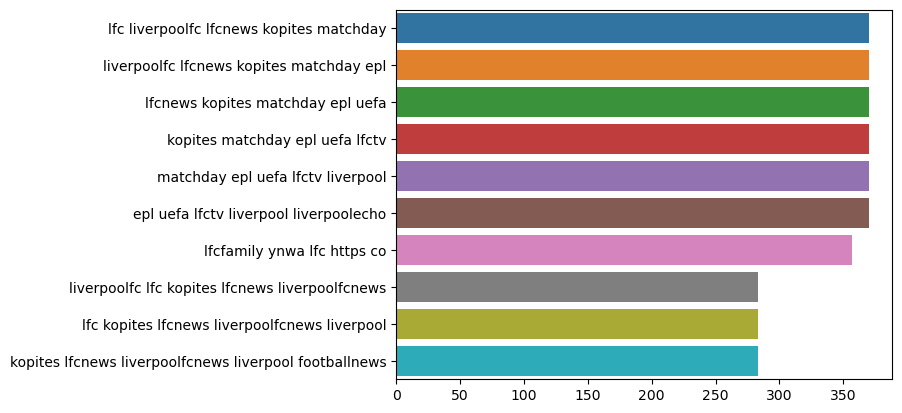

In [ ]:
plot_top_ngrams_barchart(liverpoolData['content'],5)

In [21]:
lda_model, bow_corpus, dic = get_lda_objects(liverpoolData['content'])

[nltk_data] Downloading package stopwords to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
lda_model.show_topics()

[(0,
  '0.078*"http" + 0.054*"lfc" + 0.043*"ynwa" + 0.037*"liverpool" + 0.026*"lfcfamily" + 0.024*"anfield" + 0.023*"liverpoolfc" + 0.011*"come" + 0.009*"red" + 0.008*"premierleague"'),
 (1,
  '0.058*"lfc" + 0.045*"ynwa" + 0.029*"http" + 0.014*"red" + 0.013*"liverpoolfc" + 0.011*"liverpool" + 0.011*"lfcfamily" + 0.010*"anfield" + 0.010*"game" + 0.009*"win"'),
 (2,
  '0.039*"http" + 0.034*"lfc" + 0.034*"redtogether" + 0.018*"ucl" + 0.017*"ynwa" + 0.016*"lfctv_go" + 0.013*"liverpool" + 0.010*"uclfinal" + 0.008*"soccer" + 0.008*"football"'),
 (3,
  '0.048*"http" + 0.029*"liverpool" + 0.026*"league" + 0.023*"lfc" + 0.016*"champion" + 0.014*"liverpoolfc" + 0.012*"anfield" + 0.011*"live" + 0.011*"ticket" + 0.009*"premier"'),
 (4,
  '0.054*"lfc" + 0.034*"http" + 0.025*"ynwa" + 0.023*"liverpool" + 0.017*"klopp" + 0.015*"liverpoolfc" + 0.009*"player" + 0.009*"fan" + 0.008*"anfield" + 0.008*"lfcfamily"'),
 (5,
  '0.071*"liverpool" + 0.049*"http" + 0.047*"lfc" + 0.039*"liverpoolfc" + 0.038*"epl" 

In [23]:
# Can adjust the metric value, as well as the topics
p = plot_lda_vis(lda_model, bow_corpus, dic)
pyLDAvis.save_html(p, '../UI/liv_lda.html')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aishwarya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


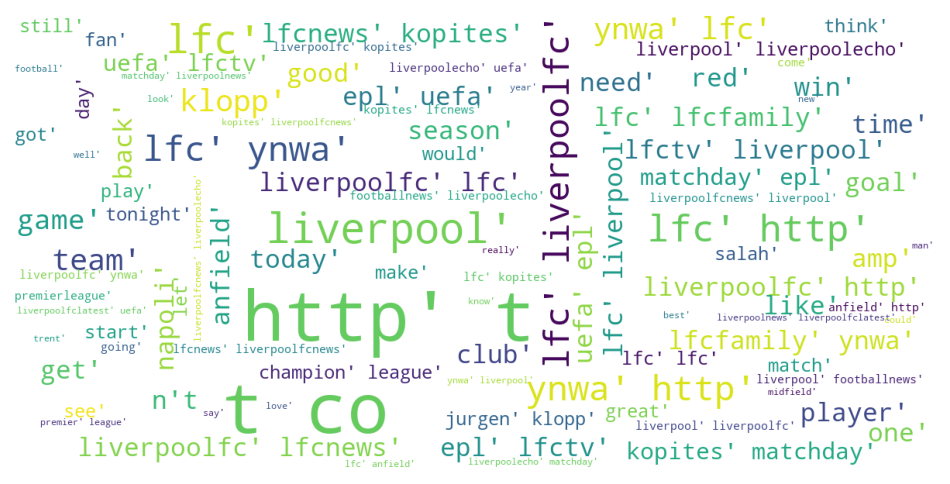

In [ ]:
plot_wordcloud(liverpoolData['content'])

<>:5: DeprecationWarning: invalid escape sequence \/
<>:7: DeprecationWarning: invalid escape sequence \$
<>:9: DeprecationWarning: invalid escape sequence \@
<>:5: DeprecationWarning: invalid escape sequence \/
<>:7: DeprecationWarning: invalid escape sequence \$
<>:9: DeprecationWarning: invalid escape sequence \@
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/1490897354.py:5: DeprecationWarning: invalid escape sequence \/
  tweetMod = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/1490897354.py:7: DeprecationWarning: invalid escape sequence \$
  tweetMod = re.sub('\$[a-zA-Z0-9]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/1490897354.py:9: DeprecationWarning: invalid escape sequence \@
  tweetMod = re.sub('\@[a-zA-Z0-9]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/1490897354.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

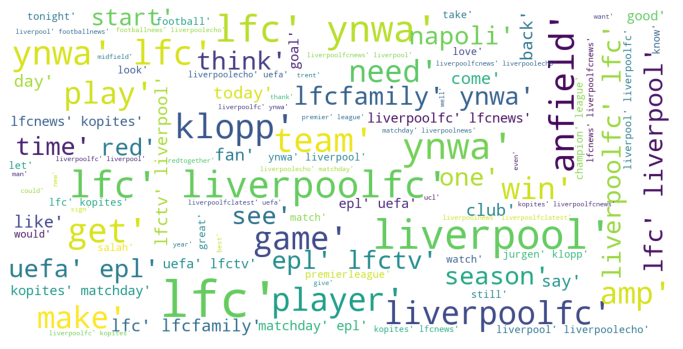

In [48]:
def featureEngineering(tweet):
    # Lower case tweet
    tweetMod = tweet.lower()
    # Replace URLs with a space in the message
    tweetMod = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweetMod)
    # Replace ticker symbols with a space. The ticker symbols are any stock symbol that starts with $.
    tweetMod = re.sub('\$[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace StockTwits usernames with a space. The usernames are any word that starts with @.
    tweetMod = re.sub('\@[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace everything not a letter or apostrophe with a space
    tweetMod = re.sub('[^a-zA-Z\']', ' ', tweetMod)
    # Remove single letter words
    tweetMod = ' '.join([w for w in tweetMod.split() if len(w) > 1])

    return tweetMod


# Process for all tweets
liverpoolData['modTweet'] = [featureEngineering(tweet) for tweet in liverpoolData['content']]

def lemmatizeTweet(tweet):
    words = [word for word in word_tokenize(tweet) if (word.isalpha()==1)]
    # Remove stop words
    stop = set(stopwords.words('english'))
    words = [word for word in words if (word not in stop)]
    # Lemmatize words (first noun, then verb)
    wnl = nltk.stem.WordNetLemmatizer()
    lemmatized = [wnl.lemmatize(wnl.lemmatize(word, 'n'), 'v') for word in words]
    return " ".join(lemmatized)

liverpoolData['lemmatizedText'] = liverpoolData["modTweet"].apply(lambda x:lemmatizeTweet(x))

plot_wordcloud(liverpoolData['lemmatizedText'])

False    14577
True       939
Name: verified, dtype: int64


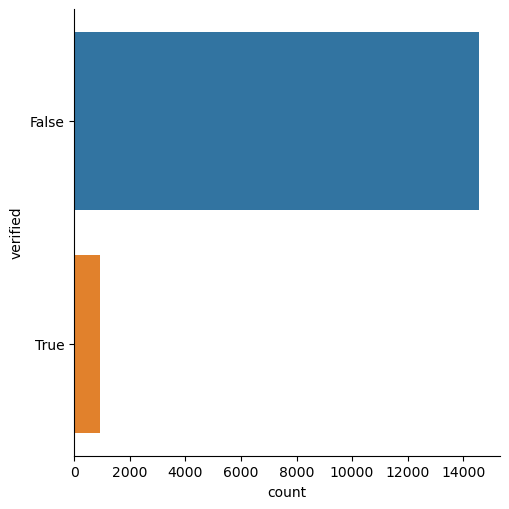

In [ ]:
print(liverpoolData["verified"].value_counts())
sb.catplot(y = "verified", data = liverpoolData, kind = "count")

Argentina              5930
Zimbabwe               3598
United States          2469
India                  1923
Kenya                   556
Germany                 407
Australia               219
Brazil                  185
Japan                   171
Trinidad and Tobago      28
Peru                     16
Canada                    7
United Kingdom            5
New Zealand               2
Name: country, dtype: int64


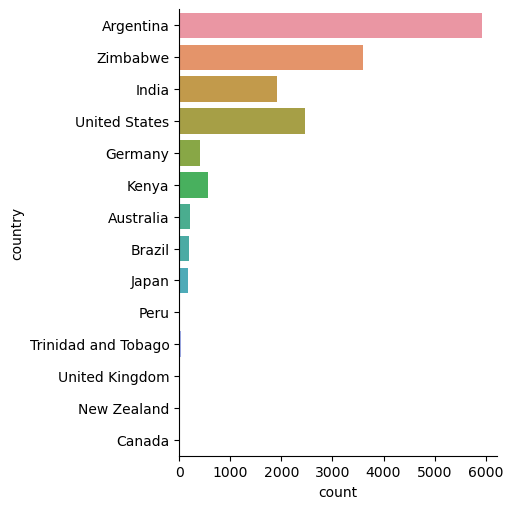

In [ ]:
print(liverpoolData["country"].value_counts())
sb.catplot(y = "country", data = liverpoolData, kind = "count")

 1    5532
-1    5118
 0    4866
Name: final_class, dtype: int64


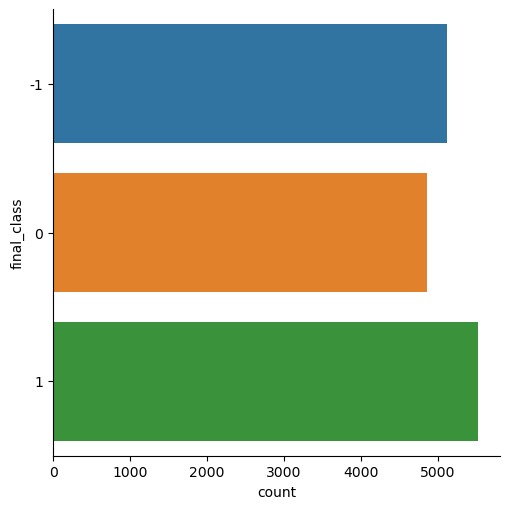

In [ ]:
print(liverpoolData["final_class"].value_counts())
sb.catplot(y = "final_class", data = liverpoolData, kind = "count")

## Tottenham 

<AxesSubplot:>

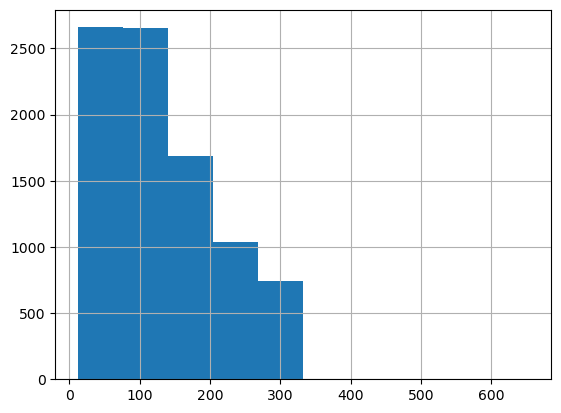

In [ ]:
totData['content'].str.len().hist()

<AxesSubplot:>

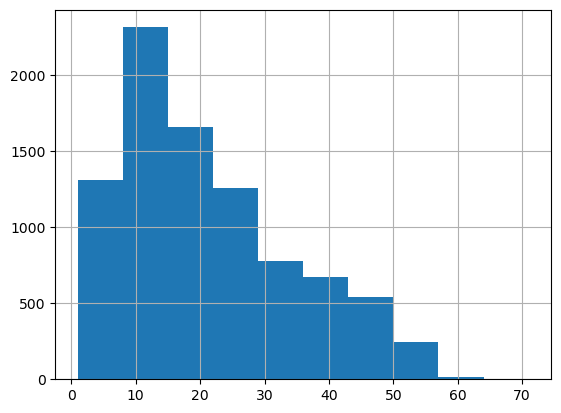

In [ ]:
totData['content'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

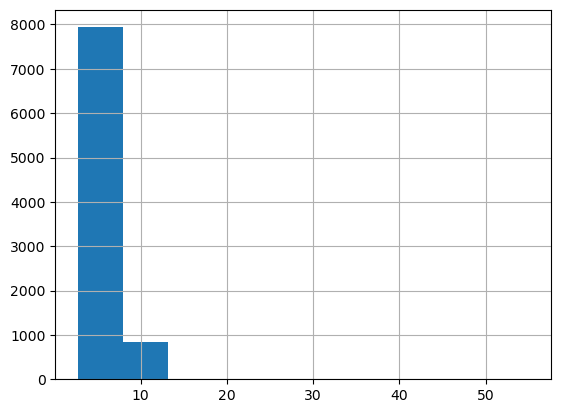

In [ ]:
totData['content'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

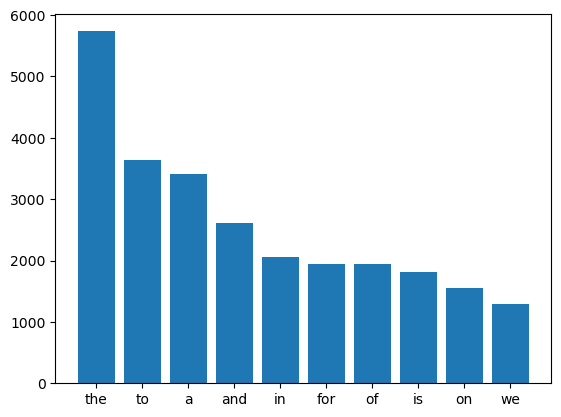

In [ ]:
# Plot the occurances of the most common stopwords in the dataset - create the corpus
corpus=[]
check= totData['content'].str.split()
check=check.values.tolist()
corpus=[word for i in check for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
mtplt.bar(x,y)
mtplt.show()

<AxesSubplot:>

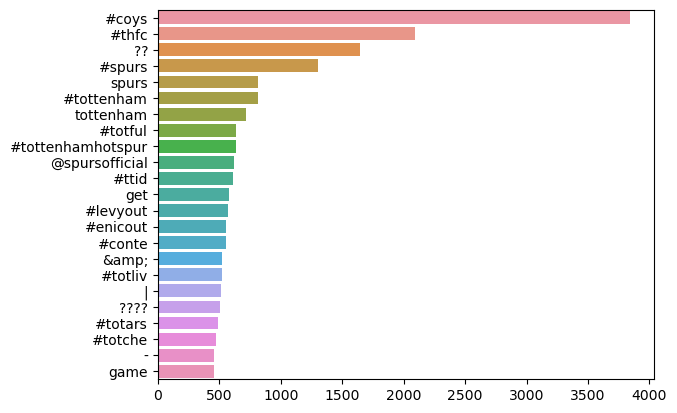

In [ ]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:60]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sb.barplot(x=y,y=x)

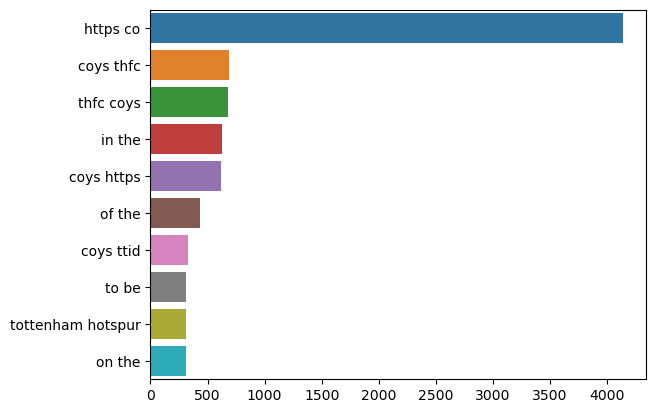

In [ ]:
plot_top_ngrams_barchart(totData['content'],2)

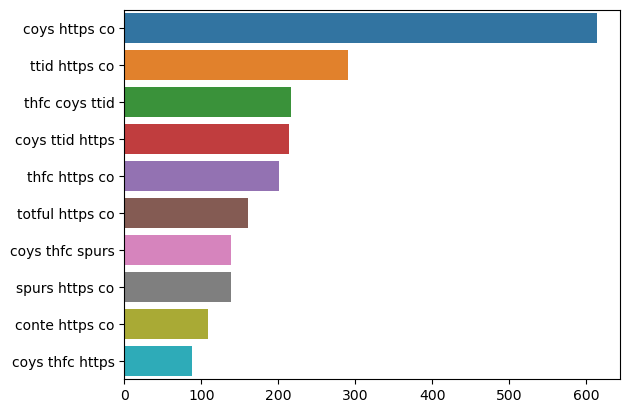

In [ ]:
plot_top_ngrams_barchart(totData['content'],3)

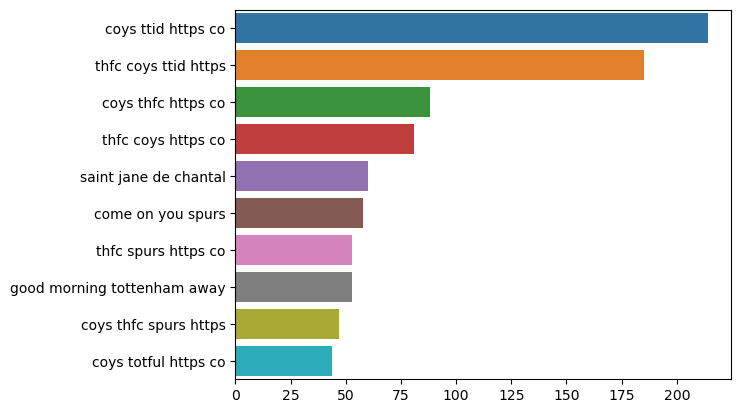

In [ ]:
plot_top_ngrams_barchart(totData['content'],4)

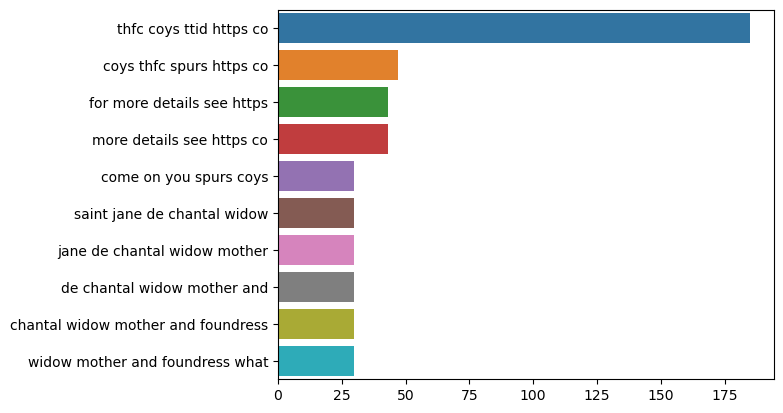

In [ ]:
plot_top_ngrams_barchart(totData['content'],5)

In [24]:
lda_model, bow_corpus, dic = get_lda_objects(totData['content'])

[nltk_data] Downloading package stopwords to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aishwarya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
lda_model.show_topics()

[(0,
  '0.029*"tottenham" + 0.024*"http" + 0.017*"coys" + 0.013*"see" + 0.009*"thfc" + 0.008*"fulham" + 0.008*"totche" + 0.007*"detail" + 0.006*"need" + 0.006*"great"'),
 (1,
  '0.050*"http" + 0.037*"coys" + 0.025*"thfc" + 0.021*"spur" + 0.009*"london" + 0.008*"kane" + 0.008*"league" + 0.007*"premier" + 0.007*"totche" + 0.007*"tottenham"'),
 (2,
  '0.026*"totliv" + 0.023*"kane" + 0.018*"spur" + 0.016*"http" + 0.012*"conte" + 0.011*"coys" + 0.009*"game" + 0.009*"match" + 0.009*"var" + 0.009*"red"'),
 (3,
  '0.063*"coys" + 0.038*"http" + 0.033*"spur" + 0.025*"thfc" + 0.021*"tottenham" + 0.015*"conte" + 0.013*"good" + 0.009*"tottenhamhotspur" + 0.007*"spursofficial" + 0.007*"half"'),
 (4,
  '0.029*"levyout" + 0.026*"enicout" + 0.021*"http" + 0.013*"spur" + 0.010*"levy" + 0.010*"coys" + 0.008*"club" + 0.008*"tottenham" + 0.007*"spursofficial" + 0.007*"n\'t"'),
 (5,
  '0.029*"coys" + 0.021*"http" + 0.017*"spur" + 0.014*"thfc" + 0.011*"conte" + 0.009*"spursofficial" + 0.009*"get" + 0.008*"se

In [26]:
# Can adjust the metric value, as well as the topics
p = plot_lda_vis(lda_model, bow_corpus, dic)
pyLDAvis.save_html(p, '../UI/tot_lda.html')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aishwarya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


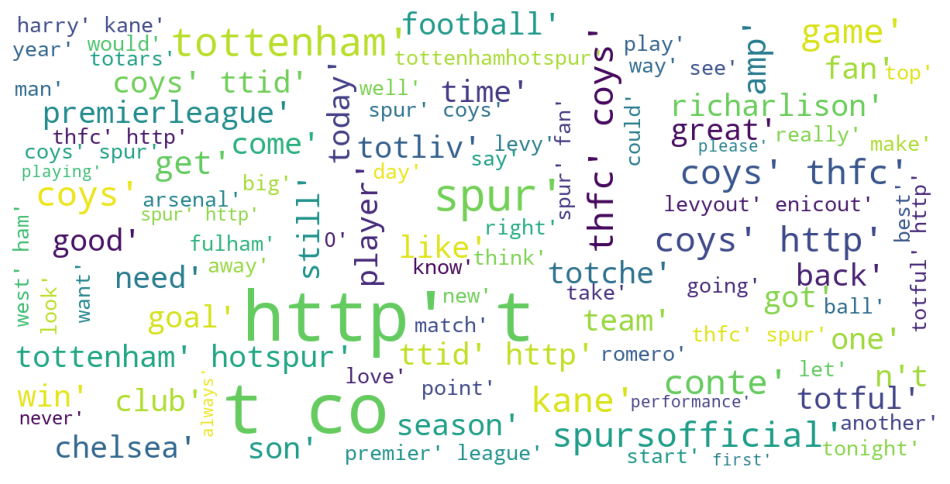

In [ ]:
plot_wordcloud(totData['content'])

<>:5: DeprecationWarning: invalid escape sequence \/
<>:7: DeprecationWarning: invalid escape sequence \$
<>:9: DeprecationWarning: invalid escape sequence \@
<>:5: DeprecationWarning: invalid escape sequence \/
<>:7: DeprecationWarning: invalid escape sequence \$
<>:9: DeprecationWarning: invalid escape sequence \@
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/377456758.py:5: DeprecationWarning: invalid escape sequence \/
  tweetMod = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/377456758.py:7: DeprecationWarning: invalid escape sequence \$
  tweetMod = re.sub('\$[a-zA-Z0-9]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/377456758.py:9: DeprecationWarning: invalid escape sequence \@
  tweetMod = re.sub('\@[a-zA-Z0-9]*', ' ', tweetMod)
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_12476/377456758.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

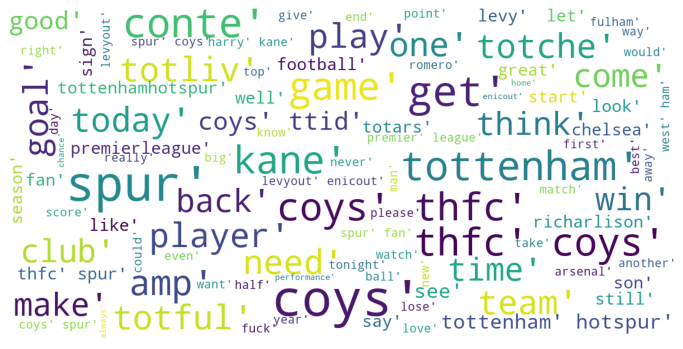

In [49]:
def featureEngineering(tweet):
    # Lower case tweet
    tweetMod = tweet.lower()
    # Replace URLs with a space in the message
    tweetMod = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweetMod)
    # Replace ticker symbols with a space. The ticker symbols are any stock symbol that starts with $.
    tweetMod = re.sub('\$[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace StockTwits usernames with a space. The usernames are any word that starts with @.
    tweetMod = re.sub('\@[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace everything not a letter or apostrophe with a space
    tweetMod = re.sub('[^a-zA-Z\']', ' ', tweetMod)
    # Remove single letter words
    tweetMod = ' '.join([w for w in tweetMod.split() if len(w) > 1])

    return tweetMod


# Process for all tweets
totData['modTweet'] = [featureEngineering(tweet) for tweet in totData['content']]

def lemmatizeTweet(tweet):
    words = [word for word in word_tokenize(tweet) if (word.isalpha()==1)]
    # Remove stop words
    stop = set(stopwords.words('english'))
    words = [word for word in words if (word not in stop)]
    # Lemmatize words (first noun, then verb)
    wnl = nltk.stem.WordNetLemmatizer()
    lemmatized = [wnl.lemmatize(wnl.lemmatize(word, 'n'), 'v') for word in words]
    return " ".join(lemmatized)

totData['lemmatizedText'] = totData["modTweet"].apply(lambda x:lemmatizeTweet(x))

plot_wordcloud(totData['lemmatizedText'])

False    8420
True      367
Name: verified, dtype: int64


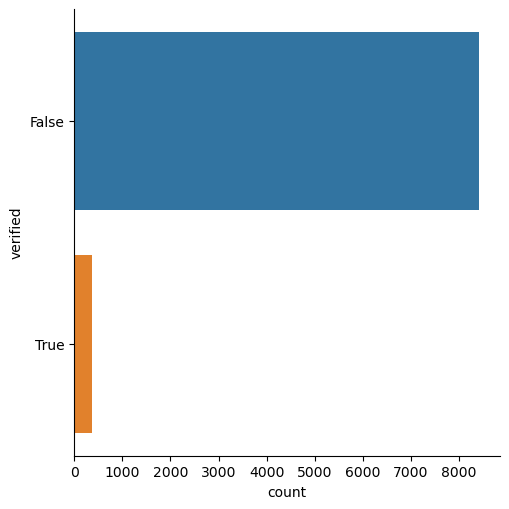

In [ ]:
print(totData["verified"].value_counts())
sb.catplot(y = "verified", data = totData, kind = "count")

Argentina         5190
United States     2161
South Africa       501
Australia          326
India              292
Brazil              84
Singapore           66
United Kingdom      54
Italy               29
Ireland             23
Mexico              22
Germany             13
Norway               8
Sweden               7
Uruguay              6
South Korea          2
New Zealand          2
Portugal             1
Name: country, dtype: int64


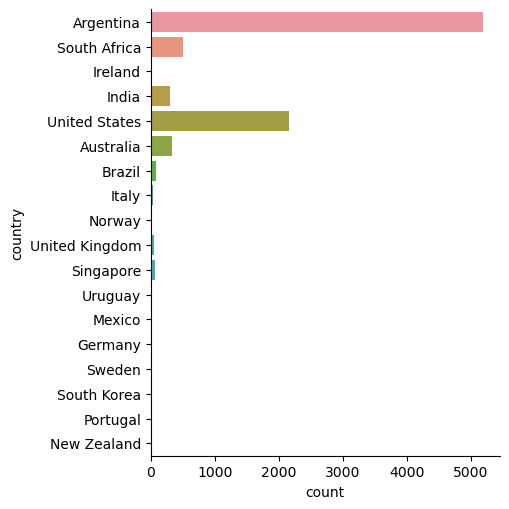

In [ ]:
print(totData["country"].value_counts())
sb.catplot(y = "country", data = totData, kind = "count")

 1    3112
 0    2861
-1    2814
Name: final_class, dtype: int64


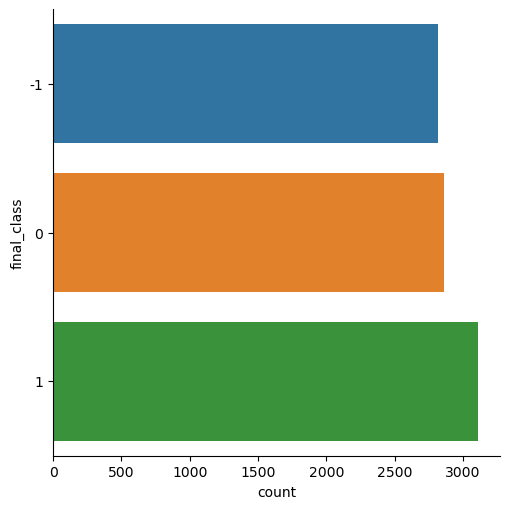

In [ ]:
print(totData["final_class"].value_counts())
sb.catplot(y = "final_class", data = totData, kind = "count")